# `EDA` to identify defaulters

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a __defaulter__. 

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

- If the applicant is __likely__ to repay the loan, then not approving the loan results in a loss of business to the company

- If the applicant is __not likely__ to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios(The categories in our `Target` variable):

- __The client with payment difficulties:__ he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

- __All other cases:__ All other cases when the payment is paid on time.

In this case study, we will use __EDA__ to understand how consumer attributes and loan attributes influence the tendency of default.

## Business Objective

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

## Importing and Inspecting `current` dataset

In [2]:
#Importing dataset
current = pd.read_csv('application_data.csv')

In [3]:
#Glancing at the dataset and understanding it's shape

#creating a function to use after every alteration, to verify the shape of the dataset.
def shape_check():
    '''
    Printing the shape of the dataset
    '''
    print('\nShape of "current" dataset:\n -', current.shape[0],'rows \n -',current.shape[1],'columns.')
    
shape_check()
current.head()


Shape of "current" dataset:
 - 307511 rows 
 - 122 columns.


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0        202500.000  406597.500    24700.500   
1               N             0        270000.000 1293502.500    35698.500   
2               Y             0         67500.000  135000.000     6750.000   
3               Y             0        135000.000  312682.500    29686.500   
4               Y             0        121500.000  513000.000    21865.500   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0       351000.000   Unaccompanied          Working   
1      1129500.000          Family    State servant   
2       135000.000   Unaccompanied          Working   
3       297000.000   Unaccompanied          Working   
4       513000.000   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                       0.019       -9461           -637          -3648.000   
1                       0.004      -16765          -1188          -1186.000   
2                       0.010      -19046           -225          -4260.000   
3                       0.008      -19005          -3039          -9833.000   
4                       0.029      -19932          -3038          -4311.000   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          nan           1               1                0   
1             -291          nan           1               1                0   
2            -2531       26.000           1               1                1   
3            -2437          nan           1               1                0   
4            -3458          nan           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers            1.000   
1                 1           1           0      Core staff            2.000   
2                 1           1           0        Laborers            1.000   
3                 1           0           0        Laborers            2.000   
4                 1           0           0      Core staff            1.000   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [4]:
# Information about the columns
current.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [5]:
# Description of numerical features
current.describe()

SK_ID_CURR     TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
count  307511.000 307511.000    307511.000        307511.000  307511.000   
mean   278180.519      0.081         0.417        168797.919  599026.000   
std    102790.175      0.272         0.722        237123.146  402490.777   
min    100002.000      0.000         0.000         25650.000   45000.000   
25%    189145.500      0.000         0.000        112500.000  270000.000   
50%    278202.000      0.000         0.000        147150.000  513531.000   
75%    367142.500      0.000         1.000        202500.000  808650.000   
max    456255.000      1.000        19.000     117000000.000 4050000.000   

       AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
count   307499.000       307233.000                  307511.000  307511.000   
mean     27108.574       538396.207                       0.021  -16036.995   
std      14493.737       369446.461                       0.014    4363.989   
min       1615.500        40500.000                       0.000  -25229.000   
25%      16524.000       238500.000                       0.010  -19682.000   
50%      24903.000       450000.000                       0.019  -15750.000   
75%      34596.000       679500.000                       0.029  -12413.000   
max     258025.500      4050000.000                       0.073   -7489.000   

       DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
count     307511.000         307511.000       307511.000   104582.000   
mean       63815.046          -4986.120        -2994.202       12.061   
std       141275.767           3522.886         1509.450       11.945   
min       -17912.000         -24672.000        -7197.000        0.000   
25%        -2760.000          -7479.500        -4299.000        5.000   
50%        -1213.000          -4504.000        -3254.000        9.000   
75%         -289.000          -2010.000        -1720.000       15.000   
max       365243.000              0.000            0.000       91.000   

       FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
count  307511.000      307511.000       307511.000        307511.000   
mean        1.000           0.820            0.199             0.998   
std         0.002           0.384            0.400             0.043   
min         0.000           0.000            0.000             0.000   
25%         1.000           1.000            0.000             1.000   
50%         1.000           1.000            0.000             1.000   
75%         1.000           1.000            0.000             1.000   
max         1.000           1.000            1.000             1.000   

       FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000  307511.000       307509.000            307511.000   
mean        0.281       0.057            2.153                 2.052   
std         0.450       0.231            0.911                 0.509   
min         0.000       0.000            1.000                 1.000   
25%         0.000       0.000            2.000                 2.000   
50%         0.000       0.000            2.000                 2.000   
75%         1.000       0.000            3.000                 2.000   
max         1.000       1.000           20.000                 3.000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                   307511.000               307511.000   
mean                         2.032                   12.063   
std                          0.503                    3.266   
min                          1.000                    0.000   
25%                          2.000                   10.000   
50%                          2.000                   12.000   
75%                          2.000                   14.000   
max                          3.000                   23.000   

       REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
count                

In [6]:
#Unique categories of categorical columns
print('Unique categories of categorical columns:'+'\n'+'*'*40)
for i in current.drop(['SK_ID_CURR','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_ID_PUBLISH'], axis=1).select_dtypes(exclude='float64').columns:
    print(i,':\n',current[i].unique())
    print()

Unique categories of categorical columns:
****************************************
TARGET :
 [1 0]

NAME_CONTRACT_TYPE :
 ['Cash loans' 'Revolving loans']

CODE_GENDER :
 ['M' 'F' 'XNA']

FLAG_OWN_CAR :
 ['N' 'Y']

FLAG_OWN_REALTY :
 ['Y' 'N']

CNT_CHILDREN :
 [ 0  1  2  3  4  7  5  6  8  9 11 12 10 19 14]

NAME_TYPE_SUITE :
 ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']

NAME_INCOME_TYPE :
 ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']

NAME_EDUCATION_TYPE :
 ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']

NAME_FAMILY_STATUS :
 ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']

NAME_HOUSING_TYPE :
 ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']

FLAG_MOBIL :
 [1 0]

FLAG_EMP_PHONE :
 [1 0]

FLAG_WOR

There seems to be some columns with `XNA` as a category, which seems to be equivalent to missing values.
Thus, we will mark `XNA` as `nan`.

In [7]:
# Replacing all `XNA` in the dataset to `nan` values
current.replace('XNA', np.nan, inplace=True)

# Valdiating above actions with an example
current['CODE_GENDER'].unique()

array(['M', 'F', nan], dtype=object)

In [8]:
#Checking % and counts of null values
pd.DataFrame((round((current.isnull().sum() / current.shape[0])*100, 2), current.isnull().sum()), index=['Percentages', 'Counts']).T.sort_values('Counts', ascending=False)

Percentages     Counts
COMMONAREA_AVG                     69.870 214865.000
COMMONAREA_MODE                    69.870 214865.000
COMMONAREA_MEDI                    69.870 214865.000
NONLIVINGAPARTMENTS_AVG            69.430 213514.000
NONLIVINGAPARTMENTS_MODE           69.430 213514.000
NONLIVINGAPARTMENTS_MEDI           69.430 213514.000
FONDKAPREMONT_MODE                 68.390 210295.000
LIVINGAPARTMENTS_MEDI              68.350 210199.000
LIVINGAPARTMENTS_AVG               68.350 210199.000
LIVINGAPARTMENTS_MODE              68.350 210199.000
FLOORSMIN_AVG                      67.850 208642.000
FLOORSMIN_MODE                     67.850 208642.000
FLOORSMIN_MEDI                     67.850 208642.000
YEARS_BUILD_AVG                    66.500 204488.000
YEARS_BUILD_MEDI                   66.500 204488.000
YEARS_BUILD_MODE                   66.500 204488.000
OWN_CAR_AGE                        65.990 202929.000
LANDAREA_MEDI                      59.380 182590.000
LANDAREA_AVG                       59.380 182590.000
LANDAREA_MODE                      59.380 182590.000
BASEMENTAREA_AVG                   58.520 179943.000
BASEMENTAREA_MODE                  58.520 179943.000
BASEMENTAREA_MEDI                  58.520 179943.000
EXT_SOURCE_1                       56.380 173378.000
NONLIVINGAREA_AVG                  55.180 169682.000
NONLIVINGAREA_MEDI                 55.180 169682.000
NONLIVINGAREA_MODE                 55.180 169682.000
ELEVATORS_AVG                      53.300 163891.000
ELEVATORS_MODE                     53.300 163891.000
ELEVATORS_MEDI                     53.300 163891.000
WALLSMATERIAL_MODE                 50.840 156341.000
APARTMENTS_MEDI                    50.750 156061.000
APARTMENTS_MODE                    50.750 156061.000
APARTMENTS_AVG                     50.750 156061.000
ENTRANCES_AVG                      50.350 154828.000
ENTRANCES_MODE                     50.350 154828.000
ENTRANCES_MEDI                     50.350 154828.000
LIVINGAREA_MEDI                    50.190 154350.000
LIVINGAREA_AVG                     50.190 154350.000
LIVINGAREA_MODE                    50.190 154350.000
HOUSETYPE_MODE                     50.180 154297.000
FLOORSMAX_AVG                      49.760 153020.000
FLOORSMAX_MODE                     49.760 153020.000
FLOORSMAX_MEDI                     49.760 153020.000
YEARS_BEGINEXPLUATATION_AVG        48.780 150007.000
YEARS_BEGINEXPLUATATION_MEDI       48.780 150007.000
YEARS_BEGINEXPLUATATION_MODE       48.780 150007.000
TOTALAREA_MODE                     48.270 148431.000
EMERGENCYSTATE_MODE                47.400 145755.000
OCCUPATION_TYPE                    31.350  96391.000
EXT_SOURCE_3                       19.830  60965.000
ORGANIZATION_TYPE                  18.010  55374.000
AMT_REQ_CREDIT_BUREAU_WEEK         13.500  41519.000
AMT_REQ_CREDIT_BUREAU_DAY          13.500  41519.000
AMT_REQ_CREDIT_BUREAU_MON          13.500  41519.000
AMT_REQ_CREDIT_BUREAU_QRT          13.500  41519.000
AMT_REQ_CREDIT_BUREAU_HOUR         13.500  41519.000
AMT_REQ_CREDIT_BUREAU_YEAR         13.500  41519.000
NAME_TYPE_SUITE                     0.420   1292.000
DEF_30_CNT_SOCIAL_CIRCLE            0.330   1021.000
OBS_60_CNT_SOCIAL_CIRCLE            0.330   1021.000
OBS_30_CNT_SOCIAL_CIRCLE            0.330   1021.000
DEF_60_CNT_SOCIAL_CIRCLE            0.330   1021.000
EXT_SOURCE_2                        0.210    660.000
AMT_GOODS_PRICE                     0.090    278.000
AMT_ANNUITY                         0.000     12.000
CODE_GENDER                         0.000      4.000
CNT_FAM_MEMBERS                     0.000      2.000
DAYS_LAST_PHONE_CHANGE              0.000      1.000
CNT_CHILDREN                        0.000      0.000
FLAG_DOCUMENT_8                     0.000      0.000
NAME_CONTRACT_TYPE                  0.000      0.000
FLAG_OWN_CAR                        0.000      0.000
FLAG_DOCUMENT_2                     0.000      0.000
FLAG_DOCUMENT_3                     0.000      0.000
FL

- Based on the above information, we will consider `47% missing values` to be the threshold for dropping the columns.

## Cleaning the `current` dataset

##### Observations:
- Most of the missing values belong to aspects related to housing. Since all of such data could be due to errors in data entry and cannot be imputed due to extremely high percentage of missing values, these will be dropped.


- `OWN_CAR_AGE` and `FLAG_OWN_CAR` might be correlated and the missing values in `OWN_CAR_AGE` could be due to car not being owned by that person. If this is the case, we will impute the missing values with `-1` and drop the `FLAG_OWN_CAR` such that __negative value__ will be possible only if the person doesn't own a car.


- `EXT_SOURCE_1`, `EXT_SOURCE_2` and `EXT_SOURCE_3` give us same information from different sources. We can take an average of all the three columns and get a more normalized score, thus reducing our columns and scope of missing values for these columns. 
    - These 3 columns will then be dropped and a new common column `EXT_SOURCE_COMBINED` will be created. This can be assumed to be a good metric since in the description of all the 3 columns, the percentile values were approximately same.
    - This way we will also be able to cover some missing infomation and still get valuable varaince out of it.


- Missing values in `ORGANIZATION_TYPE` and `OCCUPATION_TYPE` will be marked as `UNKNOWN` instead of imputing with mode. This will give us fair evaluation in our analysis.


- `AMT_REQ_CREDIT_BUREAU_` and `_CNT_SOCIAL_CIRCLE` columns will be dropped since this information is not as useful for our business objective.


- `REG_REGION_NOT_WORK_REGION`, `REG_CITY_NOT_WORK_CITY`, `LIVE_CITY_NOT_WORK_CITY`, `REG_CITY_NOT_LIVE_CITY` and `LIVE_REGION_NOT_WORK_REGION` will be dropped and `REG_REGION_NOT_LIVE_REGION` will be kept.
    - Based on the description of the columns, it would be best to use information on living region, rather than working region.


- `FLAG_MOBIL`, `FLAG_EMP_PHONE`, `FLAG_CONT_MOBIL`, `FLAG_WORK_PHONE`, `FLAG_PHONE`,`FLAG_DOCUMENT_` and `FLAG_EMAIL` are not relevant to our analysis and hence will be dropped.


- `NAME_TYPE_SUITE`, `DAYS_LAST_PHONE_CHANGE`, `WEEKDAY_APPR_PROCESS_START` and `WEEKDAY_APPR_PROCESS_START` will be dropped since the information in these columns won't help us with the analysis of our business objective.


- We will drop `CNT_FAM_MEMBERS` and use `CNT_CHILDREN` for family's parameter check, since children are more often dependant and would directly influence the financials


- We will also drop `REGION_RATING_CLIENT_W_CITY` and keep `REGION_RATING_CLIENT` instead since we get almost similar information from both columns, a more holistic view will help us rather than concentrated approach.

#### `OWN_CAR_AGE` and `FLAG_CAR_AGE`

In [9]:
# Getting the number of people who are marked as Not owning a car
print('No. of people who dont own a car:',current[current['FLAG_OWN_CAR']=='N'].shape[0])

# Number of Null values in 'OWN_CAR_AGE' column
print('Null values in "OWN_CAR_AGE":',current['OWN_CAR_AGE'].isnull().sum())

current[['FLAG_OWN_CAR', 'OWN_CAR_AGE']].head()

No. of people who dont own a car: 202924
Null values in "OWN_CAR_AGE": 202929


FLAG_OWN_CAR  OWN_CAR_AGE
0            N          nan
1            N          nan
2            Y       26.000
3            N          nan
4            N          nan

From the above we can see that the null values in `OWN_CAR_AGE` seem to be wherever the `FLAG_OWN_CAR` is marked as `N`.

Hence, imputing `-1` in the NULL values of `OWN_CAR_AGE` and drop `FLAG_OWN_CAR` seems to be the best decision.

__Note:__ A difference of 5 rows can be seen which would not hamper our analysis by a very high range and hence it will be considered as acceptable.

In [10]:
#Imputing the values
current['OWN_CAR_AGE'] = current['OWN_CAR_AGE'].fillna(-1)

#Dropping the column
current.drop('FLAG_OWN_CAR', axis=1, inplace=True)

# Valdiating above actions
print(current['OWN_CAR_AGE'].describe())

shape_check()

count   307511.000
mean         3.442
std          9.317
min         -1.000
25%         -1.000
50%         -1.000
75%          5.000
max         91.000
Name: OWN_CAR_AGE, dtype: float64

Shape of "current" dataset:
 - 307511 rows 
 - 121 columns.


#### `EXT_SOURCE_`

In [11]:
# taking average of EXT_SOURCE_ columns and assigning to a new variable EXT_SOURCE_COMBINED 
current['EXT_SOURCE_COMBINED'] =current[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']].mean(axis=1)

# Dropping the EXT_SOURCE_ columns (1,2,3)
current.drop(['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3'], axis=1, inplace=True)

# Valdiating above actions
print(current['EXT_SOURCE_COMBINED'].describe())

shape_check()

count   307339.000
mean         0.509
std          0.150
min          0.000
25%          0.414
50%          0.525
75%          0.623
max          0.879
Name: EXT_SOURCE_COMBINED, dtype: float64

Shape of "current" dataset:
 - 307511 rows 
 - 119 columns.


#### `ORGANIZATION_TYPE` and `OCCUPATION_TYPE`

In [12]:
# Filling the missing values of `organization_type` and `occupation_type` with 'UNKNOWN'
current[['ORGANIZATION_TYPE','OCCUPATION_TYPE']] = current[['ORGANIZATION_TYPE','OCCUPATION_TYPE']].fillna('UNKNOWN')

#Validating the above
for i in ['ORGANIZATION_TYPE','OCCUPATION_TYPE']:
    print(i+': '+str('UNKNOWN' in current[i].unique()))

ORGANIZATION_TYPE: True
OCCUPATION_TYPE: True


#### `AMT_REQ_CREDIT_BUREAU`

In [13]:
#Dropping unnecessary `AMT_REQ_CREDIT_BUREAU_` columns
current.drop(['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR'], axis=1, inplace=True)

#Validating the above
shape_check()


Shape of "current" dataset:
 - 307511 rows 
 - 113 columns.


#### `_CNT_SOCIAL_CIRCLE`

In [14]:
#Dropping unnecesary columns ending with '_CNT_SOCIAL_CIRCLE'
current.drop(['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE'], axis=1, inplace=True)

#Validating the above
shape_check()


Shape of "current" dataset:
 - 307511 rows 
 - 109 columns.


#### `_CITY_` and `_REG_` 

In [15]:
# Dropping the unnecessary columns
current.drop(['REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','REG_CITY_NOT_LIVE_CITY'], axis=1, inplace=True)

#Validating above changes
shape_check()


Shape of "current" dataset:
 - 307511 rows 
 - 104 columns.


#### `FLAG_`

In [16]:
# Dropping the unnecessary variables
current.drop(['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL']+[cols for cols in current.columns if 'FLAG_DOCUMENT_' in cols], axis=1, inplace=True)

#Validating above changes
shape_check()


Shape of "current" dataset:
 - 307511 rows 
 - 78 columns.


#### Dropping rest of the unnecessary columns

In [17]:
#AMT_GOODS_PRICE, AMT_ANNUITY, DAYS_REGISTERATION, DAYS_ID_PUBLISH
#Dropping the unnecessary columns
current.drop(['NAME_TYPE_SUITE', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REGION_RATING_CLIENT_W_CITY'], axis=1, inplace=True)

#Validating above changes
shape_check()


Shape of "current" dataset:
 - 307511 rows 
 - 72 columns.


#### Dropping columns with NULL values

In [18]:
#Checking % and counts of null values
print('No. of columns having more than 47% null values:',current.isnull().sum()[current.isnull().sum() > 0.47*current.shape[0]].shape[0])
pd.DataFrame((round((current.isnull().sum() / current.shape[0])*100, 2), current.isnull().sum()), index=['Percentages', 'Counts']).T.sort_values('Counts', ascending=False)

No. of columns having more than 47% null values: 47


Percentages     Counts
COMMONAREA_MEDI                    69.870 214865.000
COMMONAREA_MODE                    69.870 214865.000
COMMONAREA_AVG                     69.870 214865.000
NONLIVINGAPARTMENTS_AVG            69.430 213514.000
NONLIVINGAPARTMENTS_MODE           69.430 213514.000
NONLIVINGAPARTMENTS_MEDI           69.430 213514.000
FONDKAPREMONT_MODE                 68.390 210295.000
LIVINGAPARTMENTS_AVG               68.350 210199.000
LIVINGAPARTMENTS_MEDI              68.350 210199.000
LIVINGAPARTMENTS_MODE              68.350 210199.000
FLOORSMIN_AVG                      67.850 208642.000
FLOORSMIN_MEDI                     67.850 208642.000
FLOORSMIN_MODE                     67.850 208642.000
YEARS_BUILD_MODE                   66.500 204488.000
YEARS_BUILD_AVG                    66.500 204488.000
YEARS_BUILD_MEDI                   66.500 204488.000
LANDAREA_AVG                       59.380 182590.000
LANDAREA_MODE                      59.380 182590.000
LANDAREA_MEDI                      59.380 182590.000
BASEMENTAREA_MEDI                  58.520 179943.000
BASEMENTAREA_MODE                  58.520 179943.000
BASEMENTAREA_AVG                   58.520 179943.000
NONLIVINGAREA_MEDI                 55.180 169682.000
NONLIVINGAREA_MODE                 55.180 169682.000
NONLIVINGAREA_AVG                  55.180 169682.000
ELEVATORS_MODE                     53.300 163891.000
ELEVATORS_AVG                      53.300 163891.000
ELEVATORS_MEDI                     53.300 163891.000
WALLSMATERIAL_MODE                 50.840 156341.000
APARTMENTS_MODE                    50.750 156061.000
APARTMENTS_MEDI                    50.750 156061.000
APARTMENTS_AVG                     50.750 156061.000
ENTRANCES_MEDI                     50.350 154828.000
ENTRANCES_AVG                      50.350 154828.000
ENTRANCES_MODE                     50.350 154828.000
LIVINGAREA_AVG                     50.190 154350.000
LIVINGAREA_MODE                    50.190 154350.000
LIVINGAREA_MEDI                    50.190 154350.000
HOUSETYPE_MODE                     50.180 154297.000
FLOORSMAX_MEDI                     49.760 153020.000
FLOORSMAX_AVG                      49.760 153020.000
FLOORSMAX_MODE                     49.760 153020.000
YEARS_BEGINEXPLUATATION_MEDI       48.780 150007.000
YEARS_BEGINEXPLUATATION_AVG        48.780 150007.000
YEARS_BEGINEXPLUATATION_MODE       48.780 150007.000
TOTALAREA_MODE                     48.270 148431.000
EMERGENCYSTATE_MODE                47.400 145755.000
AMT_GOODS_PRICE                     0.090    278.000
EXT_SOURCE_COMBINED                 0.060    172.000
AMT_ANNUITY                         0.000     12.000
CODE_GENDER                         0.000      4.000
TARGET                              0.000      0.000
NAME_FAMILY_STATUS                  0.000      0.000
NAME_CONTRACT_TYPE                  0.000      0.000
FLAG_OWN_REALTY                     0.000      0.000
CNT_CHILDREN                        0.000      0.000
AMT_INCOME_TOTAL                    0.000      0.000
AMT_CREDIT                          0.000      0.000
NAME_INCOME_TYPE                    0.000      0.000
NAME_EDUCATION_TYPE                 0.000      0.000
NAME_HOUSING_TYPE                   0.000      0.000
ORGANIZATION_TYPE                   0.000      0.000
REGION_POPULATION_RELATIVE          0.000      0.000
DAYS_BIRTH                          0.000      0.000
DAYS_EMPLOYED                       0.000      0.000
DAYS_REGISTRATION                   0.000      0.000
DAYS_ID_PUBLISH                     0.000      0.000
OWN_CAR_AGE                         0.000      0.000
OCCUPATION_TYPE                     0.000      0.000
REGION_RATING_CLIENT                0.000      0.000
REG_REGION_NOT_LIVE_REGION          0.000      0.000
SK_ID_CURR                          0.000      0.000

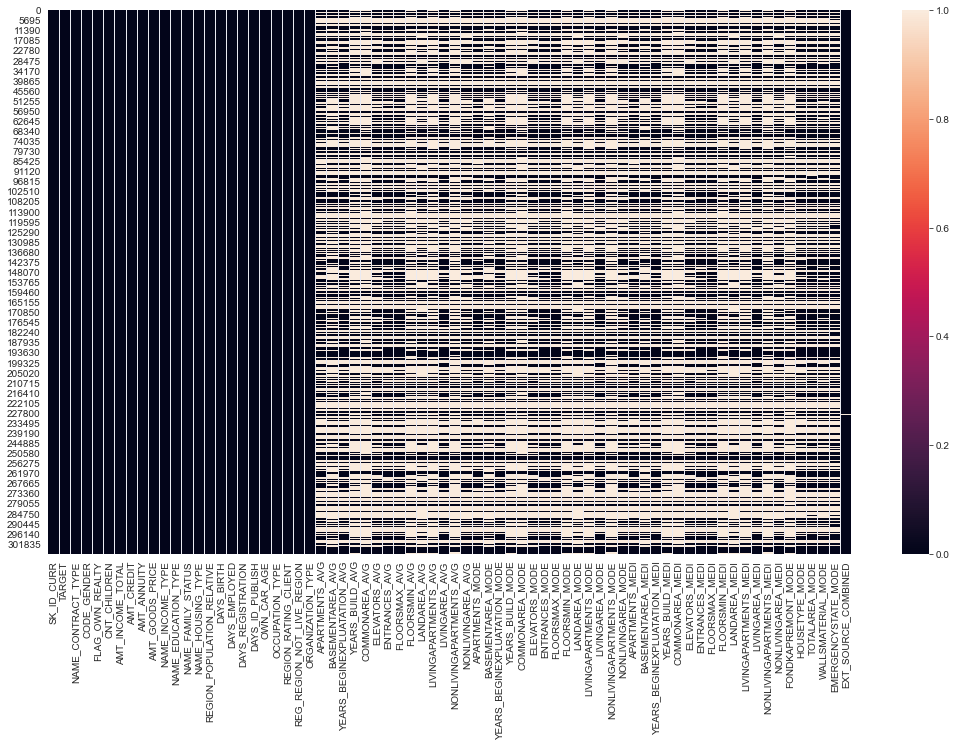

In [19]:
#Checking the structure of NULL values
plt.figure(figsize=(18,10))
sns.heatmap(current.isnull())
plt.show()

- A pattern of missing values can be observed in mostly similar rows

In [20]:
# Dropping columns with more than 47% NULL values
current.drop(current.isnull().sum()[current.isnull().sum() > 0.47*current.shape[0]].index, axis=1, inplace=True)

#Validating above changes
shape_check()
pd.DataFrame((round((current.isnull().sum() / current.shape[0])*100, 2), current.isnull().sum()), index=['Percentages', 'Counts']).T.sort_values('Counts', ascending=False).head(10)


Shape of "current" dataset:
 - 307511 rows 
 - 25 columns.


Percentages  Counts
AMT_GOODS_PRICE                   0.090 278.000
EXT_SOURCE_COMBINED               0.060 172.000
AMT_ANNUITY                       0.000  12.000
CODE_GENDER                       0.000   4.000
REGION_POPULATION_RELATIVE        0.000   0.000
ORGANIZATION_TYPE                 0.000   0.000
REG_REGION_NOT_LIVE_REGION        0.000   0.000
REGION_RATING_CLIENT              0.000   0.000
OCCUPATION_TYPE                   0.000   0.000
OWN_CAR_AGE                       0.000   0.000

#### Checking for any duplicate entries and dropping (if any)

In [21]:
current.drop_duplicates(inplace=True)

#Validating above changes
shape_check()


Shape of "current" dataset:
 - 307511 rows 
 - 25 columns.


#### Null vaues after cleaning

In [22]:
pd.DataFrame((round((current.isnull().sum() / current.shape[0])*100, 2), current.isnull().sum()), index=['Percentages', 'Counts']).T.sort_values('Counts', ascending=False).head()

Percentages  Counts
AMT_GOODS_PRICE                   0.090 278.000
EXT_SOURCE_COMBINED               0.060 172.000
AMT_ANNUITY                       0.000  12.000
CODE_GENDER                       0.000   4.000
REGION_POPULATION_RELATIVE        0.000   0.000

To impute the above missing values, we should check the outliers for continouous variables and:
   - If outliers exist, we will use median.
   - Else we wil use mean.
This way, the central tendency will be maintained and analysis will not get a huge impact in our analysis.

(Alternatively, the above rows could also be dropped before building ML models, since the ratio is relatively low and will not have any major impact on our data.)

`PS: SK_ID_CURR is not dropped for now to use it later for merging with 'previous applications' dataset`

#### Sanity checks

In [23]:
current.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_REALTY  \
0      100002       1         Cash loans           M               Y   
1      100003       0         Cash loans           F               N   
2      100004       0    Revolving loans           M               Y   
3      100006       0         Cash loans           F               Y   
4      100007       0         Cash loans           M               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0        202500.000  406597.500    24700.500       351000.000   
1             0        270000.000 1293502.500    35698.500      1129500.000   
2             0         67500.000  135000.000     6750.000       135000.000   
3             0        135000.000  312682.500    29686.500       297000.000   
4             0        121500.000  513000.000    21865.500       513000.000   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  House / apartment                       0.019       -9461           -637   
1  House / apartment                       0.004      -16765          -1188   
2  House / apartment                       0.010      -19046           -225   
3  House / apartment                       0.008      -19005          -3039   
4  House / apartment                       0.029      -19932          -3038   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE OCCUPATION_TYPE  \
0          -3648.000            -2120       -1.000        Laborers   
1          -1186.000             -291       -1.000      Core staff   
2          -4260.000            -2531       26.000        Laborers   
3          -9833.000            -2437       -1.000        Laborers   
4          -4311.000            -3458       -1.000      Core staff   

   REGION_RATING_CLIENT  REG_REGION_NOT_LIVE_REGION       ORGANIZATION_TYPE  \
0                     2                           0  Business Entity Type 3   
1                     1                           0                  School   
2                     2                           0              Government   
3                     2                           0  Business Entity Type 3   
4                     2                           0                Religion   

   EXT_SOURCE_COMBINED  
0                0.162  
1                0.467  
2                0.643  
3                0.650  
4                0.323

We need to convert values to positive in:
- `DAYS_BIRTH`
- `DAYS_EMPLOYED`
- `DAYS_ID_REGISTERATION`
- `DAYS_ID_PUBLISH`

In [24]:
#Changing days to years and converting them to positive values
current['DAYS_BIRTH'] = current['DAYS_BIRTH'].apply(lambda x: abs(x))
current['DAYS_EMPLOYED'] = current['DAYS_EMPLOYED'].apply(lambda x: abs(x))
current['DAYS_REGISTRATION'] = current['DAYS_REGISTRATION'].apply(lambda x: abs(x))
current['DAYS_ID_PUBLISH'] = current['DAYS_ID_PUBLISH'].apply(lambda x: abs(x))

#Validating the above changes
current[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']].head()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH
0        9461            637           3648.000             2120
1       16765           1188           1186.000              291
2       19046            225           4260.000             2531
3       19005           3039           9833.000             2437
4       19932           3038           4311.000             3458

In [25]:
current.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  int64  
 2   NAME_CONTRACT_TYPE          307511 non-null  object 
 3   CODE_GENDER                 307507 non-null  object 
 4   FLAG_OWN_REALTY             307511 non-null  object 
 5   CNT_CHILDREN                307511 non-null  int64  
 6   AMT_INCOME_TOTAL            307511 non-null  float64
 7   AMT_CREDIT                  307511 non-null  float64
 8   AMT_ANNUITY                 307499 non-null  float64
 9   AMT_GOODS_PRICE             307233 non-null  float64
 10  NAME_INCOME_TYPE            307511 non-null  object 
 11  NAME_EDUCATION_TYPE         307511 non-null  object 
 12  NAME_FAMILY_STATUS          307511 non-null  object 
 13  NAME_HOUSING_T

We need to correct the datatype of `OWN_CAR_AGE` and `DAYS_REGISTRATION` to int

In [26]:
current['OWN_CAR_AGE'] = current['OWN_CAR_AGE'].astype('int64')
current['DAYS_REGISTRATION'] = current['DAYS_REGISTRATION'].astype('int64')

#Validating the above
current.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  int64  
 2   NAME_CONTRACT_TYPE          307511 non-null  object 
 3   CODE_GENDER                 307507 non-null  object 
 4   FLAG_OWN_REALTY             307511 non-null  object 
 5   CNT_CHILDREN                307511 non-null  int64  
 6   AMT_INCOME_TOTAL            307511 non-null  float64
 7   AMT_CREDIT                  307511 non-null  float64
 8   AMT_ANNUITY                 307499 non-null  float64
 9   AMT_GOODS_PRICE             307233 non-null  float64
 10  NAME_INCOME_TYPE            307511 non-null  object 
 11  NAME_EDUCATION_TYPE         307511 non-null  object 
 12  NAME_FAMILY_STATUS          307511 non-null  object 
 13  NAME_HOUSING_T

### Outlier Analysis

In [27]:
#Function to check outliers
def outlier_check(data, col):
    print(data[col].describe(percentiles=[0.05,0.25,0.5,0.75,0.9,0.95,0.99]))
    sns.boxplot(y = data[col])
    plt.title('Outlier Analysis for: '+col)
    plt.ylabel(' ')
    plt.show()

##### AMT_INCOME_TOTAL

count      307511.000
mean       168797.919
std        237123.146
min         25650.000
5%          67500.000
25%        112500.000
50%        147150.000
75%        202500.000
90%        270000.000
95%        337500.000
99%        472500.000
max     117000000.000
Name: AMT_INCOME_TOTAL, dtype: float64


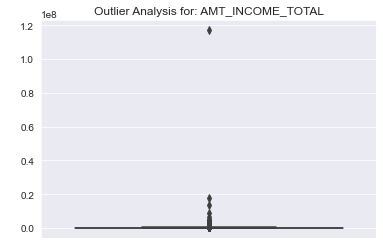

In [28]:
#Checking outliers
outlier_check(current, 'AMT_INCOME_TOTAL')

- There seem to be quite a good number of outliers
- One extreme point is seen in our plot, although it can't be rejected since the amount is possible, although a generalized analysis requires the point to be dropped
- To treat this, we drop the values above 99th percentile to get more feasible analysis.

count   304417.000
mean    162911.015
std      77494.004
min      25650.000
5%       67500.000
25%     112500.000
50%     144000.000
75%     202500.000
90%     270000.000
95%     315000.000
99%     427500.000
max     469800.000
Name: AMT_INCOME_TOTAL, dtype: float64


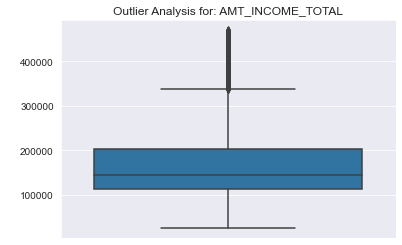

In [29]:
#Dropping the outlier point
current = current[current['AMT_INCOME_TOTAL']<current['AMT_INCOME_TOTAL'].quantile(0.99)]

#Checking outliers
outlier_check(current, 'AMT_INCOME_TOTAL')

- Based on the boxplot, there are still some outliers in the data
- Although the range of outliers that can be seen are plausible in real life and cannot be discarded as extremely rare occurences

Hence, no further alterations needed in this variable.

##### AMT_CREDIT

count    304417.000
mean     593754.914
std      396652.334
min       45000.000
5%       135000.000
25%      270000.000
50%      509400.000
75%      808650.000
90%     1125000.000
95%     1350000.000
99%     1800000.000
max     4050000.000
Name: AMT_CREDIT, dtype: float64


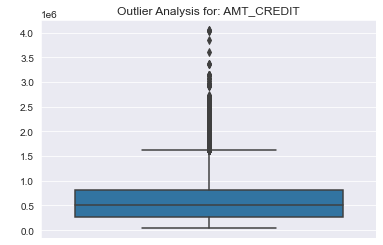

In [30]:
#Checking outliers
outlier_check(current, 'AMT_CREDIT')

- There seems to good number of of outliers
- The outlier points at the maximum stands at 38.6Lakhs, which does seem to plausible
- No treatment would be done in this case since the higher values are useful for analysis

##### AMT_ANNUITY

count   304405.000
mean     26865.611
std      14072.872
min       1615.500
5%        9000.000
25%      16456.500
50%      24750.000
75%      34362.000
90%      45364.500
95%      52686.000
99%      68850.000
max     225000.000
Name: AMT_ANNUITY, dtype: float64


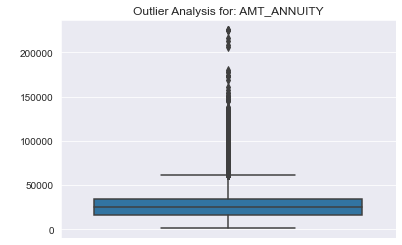

In [31]:
#Checking outliers
outlier_check(current, 'AMT_ANNUITY')

- The extreme point lies at 2.25Lakhs which doesn't seem to be by error or at random. 
- Although, we can drop the extremely high values for a more generalized analysis.

count   301358.000
mean     26296.681
std      12834.496
min       1615.500
5%        9000.000
25%      16411.500
50%      24592.500
75%      33766.875
90%      44644.500
95%      51327.000
99%      62568.000
max      68841.000
Name: AMT_ANNUITY, dtype: float64


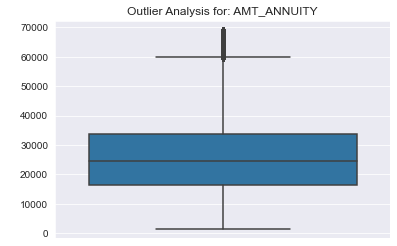

In [32]:
#Dropping the outlier point
current = current[current['AMT_ANNUITY']<current['AMT_ANNUITY'].quantile(0.99)]

#Checking outliers
outlier_check(current, 'AMT_ANNUITY')

- Seems that there are still someo utliers existing in this variable
- The range of outliers that can be spotted fall under acceptable range and will hus be considered final

##### AMT_GOODS_PRICE

count    301082.000
mean     525871.659
std      353717.518
min       40500.000
5%       135000.000
25%      238500.000
50%      450000.000
75%      679500.000
90%     1035000.000
95%     1206000.000
99%     1620000.000
max     2700000.000
Name: AMT_GOODS_PRICE, dtype: float64


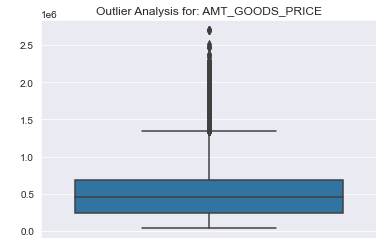

In [33]:
#Checking outliers
outlier_check(current, 'AMT_GOODS_PRICE')

- There seems to be some outliers in this variable as well
- These values are normally plausible and can be expected in real life
- Since these can't be taken as rare occurences, no treatment is required.

##### REGION_POPULATION_RELATIVE

count   301358.000
mean         0.021
std          0.014
min          0.000
5%           0.005
25%          0.010
50%          0.019
75%          0.029
90%          0.036
95%          0.046
99%          0.073
max          0.073
Name: REGION_POPULATION_RELATIVE, dtype: float64


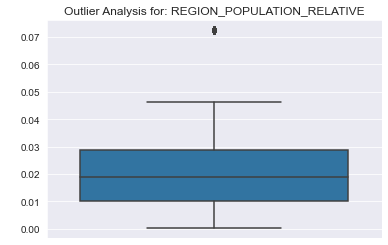

In [34]:
#Checking outliers
outlier_check(current, 'REGION_POPULATION_RELATIVE')

- Some outlier points can be observed here.
- This could probably mean the datapoint belongs to highly dense place such as a slum, etc.
- This point could give us interesting results, hence no outlier treatment is to be done.

##### DAYS_BIRTH

count   301358.000
mean     16038.252
std       4375.964
min       7489.000
5%        9389.000
25%      12398.000
50%      15750.000
75%      19697.750
90%      22198.000
95%      23216.000
99%      24432.430
max      25201.000
Name: DAYS_BIRTH, dtype: float64


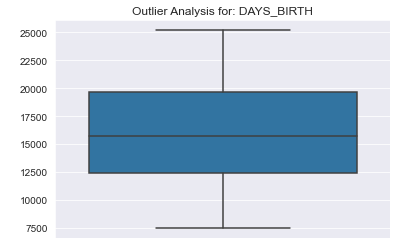

In [35]:
#Checking outliers
outlier_check(current, 'DAYS_BIRTH')

- The maximum value suggests an age of ~70 years, which is plausible and can't be discarded.
- The values are sane and need no outlier treatment.

##### DAYS_EMPLOYED

count   301358.000
mean     68366.063
std     139981.924
min          0.000
5%         228.000
25%        930.000
50%       2218.000
75%       5781.000
90%     365243.000
95%     365243.000
99%     365243.000
max     365243.000
Name: DAYS_EMPLOYED, dtype: float64


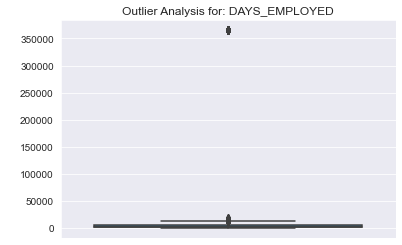

In [36]:
#Checking outliers
outlier_check(current, 'DAYS_EMPLOYED')

- This column seems to have some extremely high outlier points, which is not possible to exist (1000 years)
- Outlier treatment is mandatory in this case, the outliers will be dropped by manually entering the value.

count   246555.000
mean      2377.756
std       2336.863
min          0.000
5%         205.000
25%        763.000
50%       1641.000
75%       3167.000
90%       5326.000
95%       7289.000
99%      11322.460
max      17912.000
Name: DAYS_EMPLOYED, dtype: float64


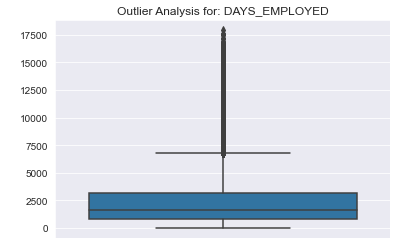

In [37]:
#Dropping the outlier point
current = current[current['DAYS_EMPLOYED']<365243]

#Checking outliers
outlier_check(current, 'DAYS_EMPLOYED')

- After dropping the extreme outlier, we still have many outliers.
- Based on the information, a maximum of 50 years of employment can be observed at the 100th percentile and 30 years of employment at the 99th percentile.
    - We will drop values above 99the percentile and consider that as the final alteration to this variable.

count   244089.000
mean      2272.268
std       2094.983
min          0.000
5%         204.000
25%        756.000
50%       1620.000
75%       3108.000
90%       5146.000
95%       6810.000
99%       9731.000
max      11322.000
Name: DAYS_EMPLOYED, dtype: float64


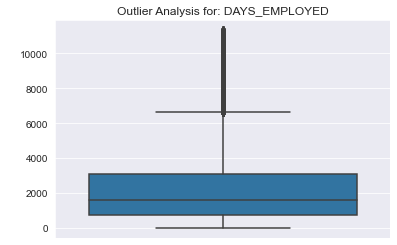

In [38]:
#Dropping the outlier point
current = current[current['DAYS_EMPLOYED']<current['DAYS_EMPLOYED'].quantile(0.99)]

#Checking outliers
outlier_check(current, 'DAYS_EMPLOYED')

- This variable now has values in acceptable range.

##### DAYS_REGISTRATION

count   244089.000
mean      4610.036
std       3227.090
min          0.000
5%         311.000
25%       1839.000
50%       4250.000
75%       6911.000
90%       9177.000
95%      10303.000
99%      12749.000
max      22701.000
Name: DAYS_REGISTRATION, dtype: float64


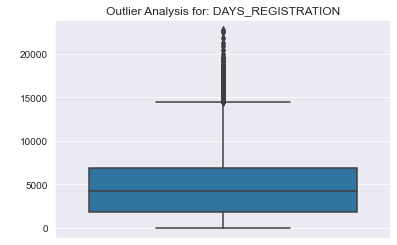

In [39]:
outlier_check(current, 'DAYS_REGISTRATION')

- The plot shows some extreme value, where the max value stands at 22928 days, i.e. ~62 years, it might be possible, but it clearly is an outlier.
- We will keep values till 99th percentile and drop the rest.

count   241646.000
mean      4515.213
std       3099.236
min          0.000
5%         308.000
25%       1816.000
50%       4209.000
75%       6808.000
90%       9018.000
95%      10039.000
99%      11774.000
max      12748.000
Name: DAYS_REGISTRATION, dtype: float64


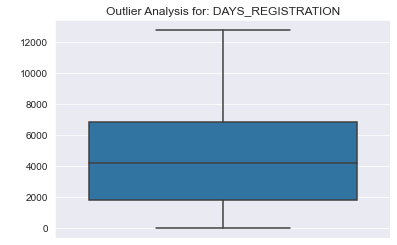

In [40]:
#Dropping the outlier point
current = current[current['DAYS_REGISTRATION']<current['DAYS_REGISTRATION'].quantile(0.99)]

#Checking outliers
outlier_check(current, 'DAYS_REGISTRATION')

##### DAYS_ID_PUBLISH

count   241646.000
mean      2785.988
std       1518.524
min          0.000
5%         323.000
25%       1464.000
50%       2858.000
75%       4171.000
90%       4666.000
95%       4914.000
99%       5454.000
max       7197.000
Name: DAYS_ID_PUBLISH, dtype: float64


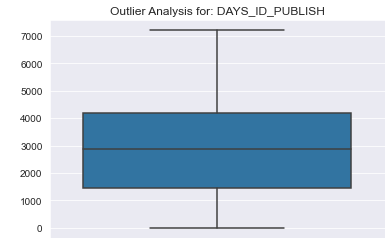

In [41]:
outlier_check(current, 'DAYS_ID_PUBLISH')

- The plot doesn't show any signs of outliers.
- The upper fence seems to be quite far away from 75th percentile point, suggesting more populaton between 75th percentile and 100th percentile.

##### EXT_SOURCE_COMBINED

count   241510.000
mean         0.500
std          0.149
min          0.000
5%           0.230
25%          0.404
50%          0.514
75%          0.611
90%          0.684
95%          0.718
99%          0.767
max          0.879
Name: EXT_SOURCE_COMBINED, dtype: float64


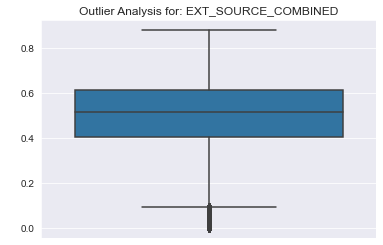

In [42]:
#Checking outliers
outlier_check(current, 'EXT_SOURCE_COMBINED')

- There seems to be some extremely low values in this column
- These low values seem to be possible for people who defaulted very often or don't have a profile created yet (due to never applying for a loan, etc.) and could be good indicators for our business objective.
- No outlier treatment is to be done

### Binning

We will apply __binning__ of categories for a better analysis and spot variables with higher chances of occuring

In [43]:
#Checking counts of categories
current['CNT_CHILDREN'].value_counts(normalize=True)

0    0.636
1    0.241
2    0.106
3    0.015
4    0.002
5    0.000
6    0.000
7    0.000
19   0.000
14   0.000
12   0.000
10   0.000
9    0.000
8    0.000
11   0.000
Name: CNT_CHILDREN, dtype: float64

In [44]:
#We can see that there isn't much representation of children above 3. Therefore , we put them in a category as "more than 3"
current['CNT_CHILDREN'] = current['CNT_CHILDREN'].apply(lambda x:'more than 3' if int(x)>3 else x)

#Validating above changes
current['CNT_CHILDREN'].value_counts()

0              153742
1               58161
2               25702
3                3524
more than 3       517
Name: CNT_CHILDREN, dtype: int64

In [45]:
#Checking counts of categories
current['OCCUPATION_TYPE'].value_counts(normalize=True)

Laborers                0.222
UNKNOWN                 0.162
Sales staff             0.130
Core staff              0.109
Managers                0.079
Drivers                 0.075
High skill tech staff   0.045
Accountants             0.038
Medicine staff          0.033
Security staff          0.027
Cooking staff           0.024
Cleaning staff          0.019
Private service staff   0.011
Low-skill Laborers      0.009
Waiters/barmen staff    0.006
Secretaries             0.005
Realty agents           0.003
HR staff                0.002
IT staff                0.002
Name: OCCUPATION_TYPE, dtype: float64

In [46]:
# For the occupations having less than 0.01 values we put them as "Others" category
current['OCCUPATION_TYPE'] = current['OCCUPATION_TYPE'].apply(lambda x:'Others' if x in ['Private service staff',\
'Low-skill Laborers','Waiters/barmen staff','Secretaries','Realty agents','HR staff','IT staff'] else x)

#Validating above changes
current['OCCUPATION_TYPE'].value_counts(normalize=True)

Laborers                0.222
UNKNOWN                 0.162
Sales staff             0.130
Core staff              0.109
Managers                0.079
Drivers                 0.075
High skill tech staff   0.045
Accountants             0.038
Others                  0.037
Medicine staff          0.033
Security staff          0.027
Cooking staff           0.024
Cleaning staff          0.019
Name: OCCUPATION_TYPE, dtype: float64

In [47]:
#Checking the counts of categories
org_type_dict = current['ORGANIZATION_TYPE'].value_counts(normalize=True)
org_type_dict

Business Entity Type 3   0.269
Self-employed            0.155
Other                    0.066
Medicine                 0.044
Government               0.041
Business Entity Type 2   0.041
School                   0.035
Trade: type 7            0.031
Kindergarten             0.027
Construction             0.027
Business Entity Type 1   0.024
Transport: type 4        0.021
Trade: type 3            0.014
Industry: type 9         0.013
Industry: type 3         0.013
Security                 0.013
Housing                  0.012
Industry: type 11        0.011
Military                 0.010
Bank                     0.010
Agriculture              0.010
Police                   0.009
Transport: type 2        0.009
Postal                   0.009
Security Ministries      0.008
Trade: type 2            0.008
Restaurant               0.007
Services                 0.006
University               0.005
Industry: type 7         0.005
Transport: type 3        0.005
Industry: type 1         0.004
Hotel   

In [48]:
#Binning categories with <0.01 in 'Organization_type' in 'other' category
current['ORGANIZATION_TYPE'] = current['ORGANIZATION_TYPE'].apply(lambda x:'Other' if org_type_dict[x]<0.01  else x)

#Validating above changes
current['ORGANIZATION_TYPE'].value_counts(normalize=True)

Business Entity Type 3   0.269
Other                    0.198
Self-employed            0.155
Medicine                 0.044
Government               0.041
Business Entity Type 2   0.041
School                   0.035
Trade: type 7            0.031
Kindergarten             0.027
Construction             0.027
Business Entity Type 1   0.024
Transport: type 4        0.021
Trade: type 3            0.014
Industry: type 9         0.013
Industry: type 3         0.013
Security                 0.013
Housing                  0.012
Industry: type 11        0.011
Military                 0.010
Name: ORGANIZATION_TYPE, dtype: float64

In [49]:
#Checking the counts of categories
income_type_dict = current['NAME_INCOME_TYPE'].value_counts(normalize=True)
income_type_dict

Working                0.636
Commercial associate   0.279
State servant          0.085
Student                0.000
Pensioner              0.000
Businessman            0.000
Maternity leave        0.000
Name: NAME_INCOME_TYPE, dtype: float64

In [50]:
#Since some columns have values at 0.000, we will put them as 'no income group'
current['NAME_INCOME_TYPE'] = current['NAME_INCOME_TYPE'].apply(lambda x:'No income group' if income_type_dict[x]<=0.001 else x)

#Validating above changes
current['NAME_INCOME_TYPE'].value_counts(normalize=True)

Working                0.636
Commercial associate   0.279
State servant          0.085
No income group        0.000
Name: NAME_INCOME_TYPE, dtype: float64

In [51]:
#Checking the description
current['DAYS_BIRTH'].describe()

count   241646.000
mean     14641.107
std       3601.750
min       7489.000
25%      11695.000
50%      14454.000
75%      17368.000
max      25180.000
Name: DAYS_BIRTH, dtype: float64

In [52]:
#Binning in terms of years of birth to divide in different sections of age group
current['DAYS_BIRTH_BIN']=pd.cut((current['DAYS_BIRTH'])//365, bins=(18,30,45,60,70), labels=('18-30','30-45','45-60','60+'))

#Validating above changes
current['DAYS_BIRTH_BIN'].value_counts()

30-45    118542
45-60     67667
18-30     51929
60+        3508
Name: DAYS_BIRTH_BIN, dtype: int64

In [53]:
#Checking the description
current['AMT_INCOME_TOTAL'].describe()

count   241646.000
mean    167887.163
std      76839.183
min      25650.000
25%     112500.000
50%     157500.000
75%     202500.000
max     469800.000
Name: AMT_INCOME_TOTAL, dtype: float64

In [54]:
#Binning
current['AMT_INCOME_TOTAL_BIN'] = pd.qcut(current['AMT_INCOME_TOTAL'], q=[0,0.2,0.5,0.75,0.95,1], labels=['very low','low','medium','high','very high'])

#Validating above changes
current['AMT_INCOME_TOTAL_BIN'].value_counts()

very low     71825
low          67229
high         47019
medium       44598
very high    10975
Name: AMT_INCOME_TOTAL_BIN, dtype: int64

In [55]:
#Checking the description
current['EXT_SOURCE_COMBINED'].describe()

count   241510.000
mean         0.500
std          0.149
min          0.000
25%          0.404
50%          0.514
75%          0.611
max          0.879
Name: EXT_SOURCE_COMBINED, dtype: float64

In [56]:
#Binning
current['EXT_SOURCE_COMBINED_BIN'] = pd.qcut(current['EXT_SOURCE_COMBINED'], q=[0,0.3,0.5,0.7,0.85,1], labels=['Very Poor','Poor','Fair','Good','Very Good'])

#Validating above changes
current['EXT_SOURCE_COMBINED_BIN'].value_counts()

Very Poor    72453
Fair         48302
Poor         48302
Very Good    36227
Good         36226
Name: EXT_SOURCE_COMBINED_BIN, dtype: int64

In [57]:
#Checking the description
current['DAYS_EMPLOYED'].describe()

count   241646.000
mean      2263.452
std       2086.882
min          0.000
25%        753.000
50%       1615.000
75%       3097.000
max      11322.000
Name: DAYS_EMPLOYED, dtype: float64

In [58]:
#Binning in terms of years
current['DAYS_EMPLOYED_BIN']=pd.cut(current['DAYS_EMPLOYED']//365, bins=[0,2,5,15,30,50], labels=['<2','2-5','5-15','15-30','30-50'])

#Validating above changes
current['DAYS_EMPLOYED_BIN'].value_counts()

5-15     75930
2-5      61190
<2       59950
15-30    17299
30-50        5
Name: DAYS_EMPLOYED_BIN, dtype: int64

## Univariate Analysis

### Seperating datasets based on `TARGET` variable

Value counts of TARGET variable:
0    220304
1     21342
Name: TARGET, dtype: int64


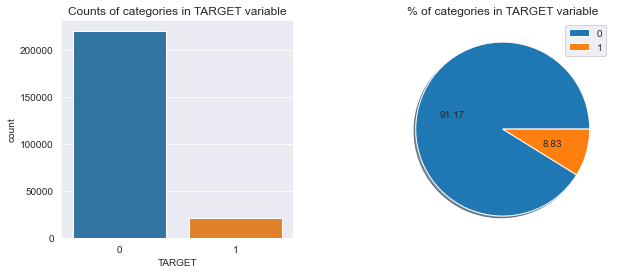

In [59]:
#Counts of categories in TARGET Variable
print('Value counts of TARGET variable:')
print(current['TARGET'].value_counts())

plt.figure(figsize=(10,4))

#Countplot
plt.subplot(1,2,1)
sns.countplot(current['TARGET'])
plt.title('Counts of categories in TARGET variable')

#Piechart
plt.subplot(1,2,2)
plt.pie(current['TARGET'].value_counts(), autopct='%.2f', shadow=True, labels=[0,1], labeldistance=None)
plt.legend()
plt.title('% of categories in TARGET variable')

plt.subplots_adjust(wspace=0.4)
plt.show()

- The `TARGET` variable clearly has a __huge data imbalance__
- ~92% of rows have `0` as a value, which means, we have majority of data where people had no difficulties in making payments.
- The sample data that we have has huge bias towards `0` category
- Downsampling the Major category (`0`) and using synthetic techniques such as SMOTE to upsample the minor category(`1`) will be required for avoding bias while building models in this situation.

In [60]:
#Dataset with TARGET variable as 0 only
current_0 = current[current['TARGET']==0]
print('Shape of current_0: ', current_0.shape)

#Dataset with TARGET variable as 1 only
current_1 = current[current['TARGET']==1]
print('Shape of current_1: ', current_1.shape)

Shape of current_0:  (220304, 29)
Shape of current_1:  (21342, 29)


### Categorical Variables

In [61]:
#Function for categorical columns univariate analysis
def uni_categorical_current(col, orient='v', rot=0):
    '''
    This function plots pie chart and a countplot for 'col' in current dataset. 
    NOTE: It does not plot pie charts if the number of categories are more than 4
    
    col = column name (in apostrophes (" "))
    orient = orientation of bar graph ('v' or 'h', 'v' by default)
    rot = rotation of xticks text
    '''
    count=0
    
    if len(current_0[col].unique())<5 or len(current_1[col].unique())<5:
        fig, ax = plt.subplots(2,2, figsize=(10,8))
        ax = ax.flatten()
        plt.suptitle('Univariate Analysis of '+col, fontsize=15, y=1.02, x=0.54)
        #plt.xticks(rotation=rot)

        #Pie chart
        cmap_0 = plt.get_cmap('Wistia')
        colors_0 = [cmap_0(i) for i in np.linspace(0, 1, len(current_0[col].value_counts()))]

        current_0[col].value_counts().plot(kind='pie', autopct='%.2f', shadow=True, ax=ax[count], labeldistance=None, colors=colors_0, labels=current_0[col].value_counts().index)
        ax[count].set_title('Customers who paid on time')
        ax[count].legend()
        ax[count].set_ylabel(' ')
        count=count+1

        cmap_1 = plt.get_cmap('summer')
        colors_1 = [cmap_1(i) for i in np.linspace(0, 1, len(current_1[col].value_counts()))]

        current_1[col].value_counts().plot(kind='pie', autopct='%.2f', shadow=True, ax=ax[count], labeldistance=None, colors=colors_1, labels=current_1[col].value_counts().index)
        ax[count].set_title("Customers who did not pay on time")
        ax[count].legend()
        ax[count].set_ylabel(' ')
        count=count+1
        
    else:
        fig, ax = plt.subplots(1,2, figsize=(10,6))
        ax = ax.flatten()
        plt.suptitle('Univariate Analysis of '+col, fontsize=15, y=1.02, x=0.54)
        

    #Bar chart
    if orient=='v':
        sns.countplot(x = current_0[col], ax=ax[count], palette='Wistia')
        if count==0:
            ax[count].set_title('Customers who paid on time')
        ax[count].set_xlabel(' ')
        ax[count].tick_params('x',labelrotation=rot)
        count=count+1
    elif orient=='h':
        sns.countplot(y = current_0[col], ax=ax[count], palette='Wistia')
        if count==0:
            ax[count].set_title('Customers who paid on time')
        ax[count].set_xlabel(' ')
        ax[count].tick_params('x',labelrotation=rot)
        count=count+1
        
    if orient=='v':
        sns.countplot(x = current_1[col], ax=ax[count], palette='summer')
        if count==1:
            ax[count].set_title("Customers who did not pay on time")
        ax[count].set_xlabel(' ')
        ax[count].tick_params('x',labelrotation=rot)
    elif orient=='h':
        sns.countplot(y = current_1[col], ax=ax[count], palette='summer')
        if count==1:
            ax[count].set_title("Customers who did not pay on time")
        ax[count].set_xlabel(' ')
        ax[count].tick_params('x',labelrotation=rot)
        
    plt.tight_layout(w_pad=10)

#### `NAME_CONTRACT_TYPE`

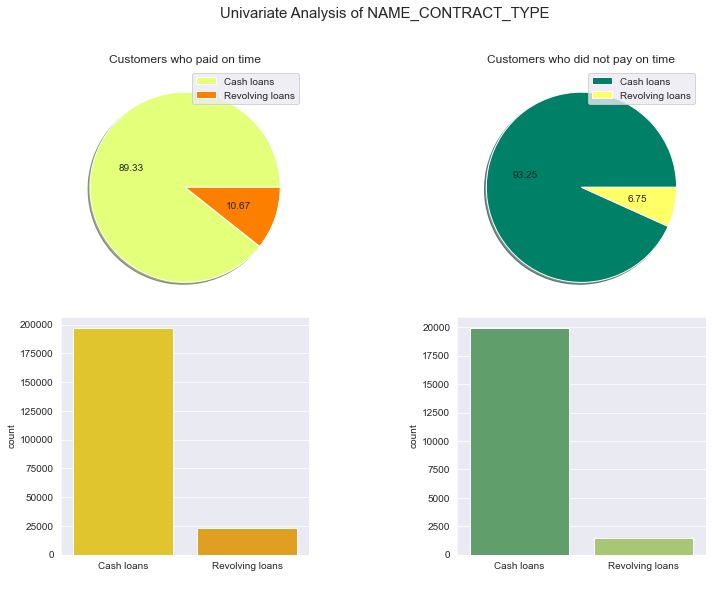

In [62]:
uni_categorical_current(col = 'NAME_CONTRACT_TYPE')

- There is a high imbalance in both the cases
- 'Revolving loans' belong to the minority class
- The ratio of both the categories does not seem significant enough to consider this as a major factor for deciding defaulters.

#### `CODE_GENDER`

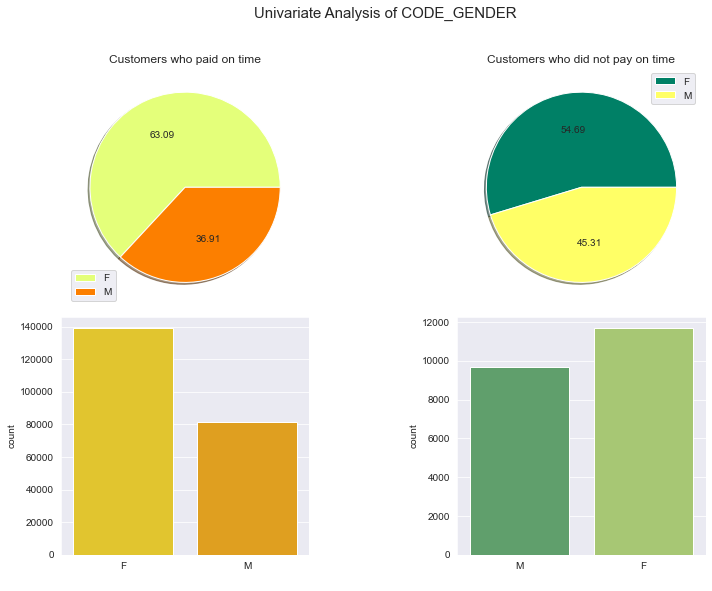

In [63]:
uni_categorical_current(col = 'CODE_GENDER')

- Females seem to have taken more loans on average than Male population
- The ratio of Females is higher in the 'customers who paid on time' graph compared to 'customers who didnt pay on time' graph
- Comparing both the plots, we can see an increase in the ratio of Male population defaulting, compared to female population.

#### `FLAG_OWN_REALTY`

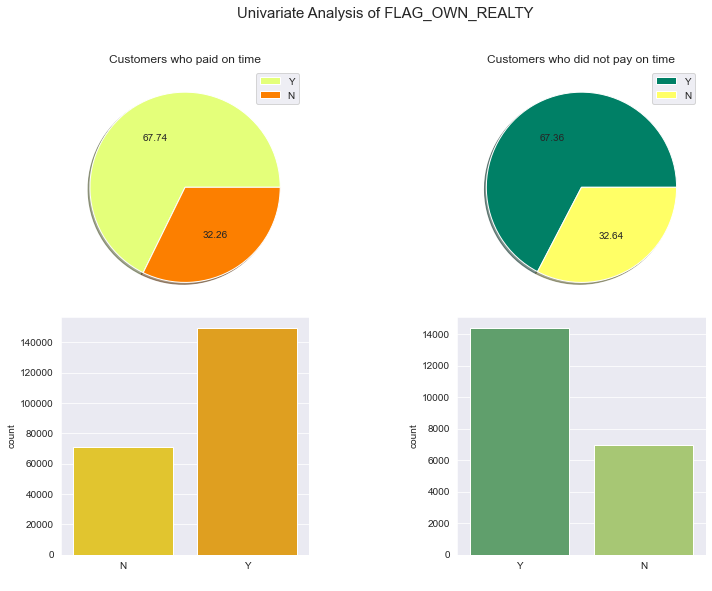

In [64]:
uni_categorical_current(col = 'FLAG_OWN_REALTY')

- Interstingly, the ratio of people who own their own homes vs people who dont have own homes have similar percentage in both the cases.
- No reasonable inferences could be made with this column either.

#### `CNT_CHILDREN`

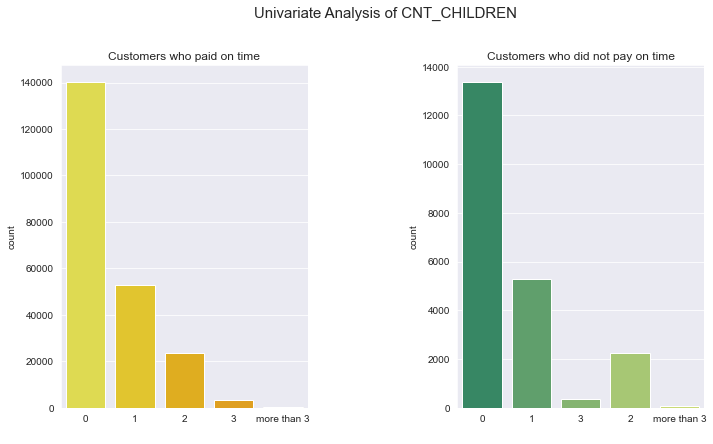

In [65]:
uni_categorical_current(col = 'CNT_CHILDREN')

- In both the cases, keeping in mind the imbalance of target variable, the scales suggest that the data is very similar.
- The similarity of the data causes it be insignifcant individually for our business objective to detect defaulters.

#### `NAME_INCOME_TYPE`

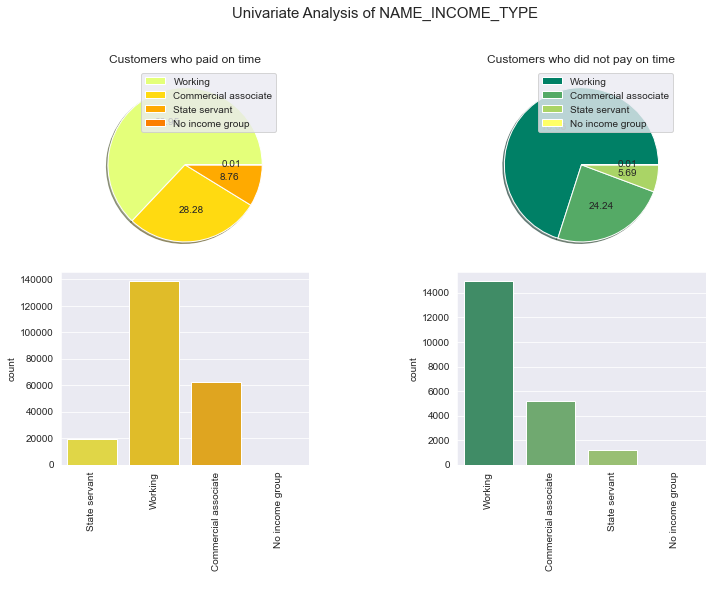

In [66]:
uni_categorical_current(col = 'NAME_INCOME_TYPE', rot=90)

- The highest number of defaulters are found in the 'working' category, followed by 'commercial associate'
- The difference in the categories give us some significant information such as , pensioners have mostly paid on time, while in relatively less cases, they tend to default

#### `NAME_EDUCATION_TYPE`

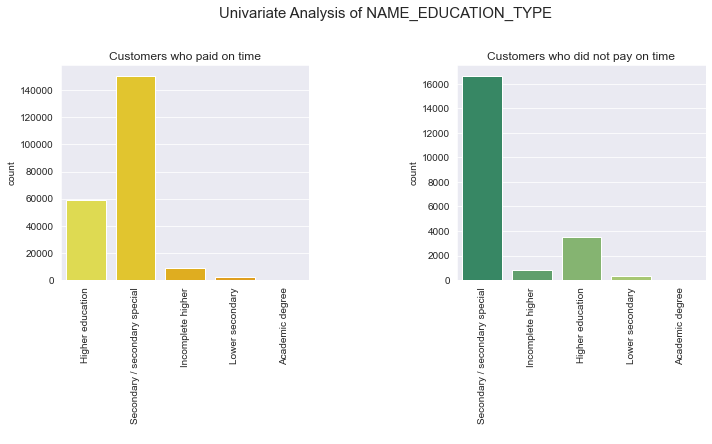

In [67]:
uni_categorical_current(col = 'NAME_EDUCATION_TYPE', rot=90)

- 'Higher Education' category has lower ratio of defaulting.
- Secondary/Secondary Special cases has high cases of on-time payment, but they also have highest defaulting cases.

#### `NAME_FAMILY_STATUS`

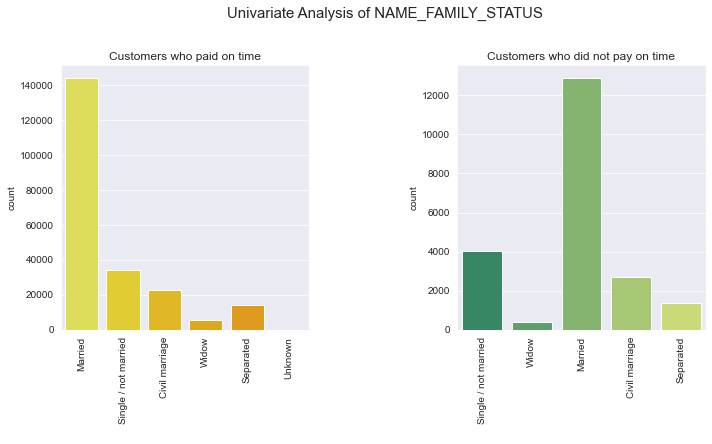

In [68]:
uni_categorical_current(col = 'NAME_FAMILY_STATUS', rot=90)

- 'Married' people have most often not made payments on time and tend to default when compared to other categories.
- 'Civil Marriage' category has a higher ratio in defaulted category
- With consideration of the imbalance of the data, the categories are almost similar in ratios. Not enough significant information can be drawn out here.

#### `NAME_HOUSING_TYPE`

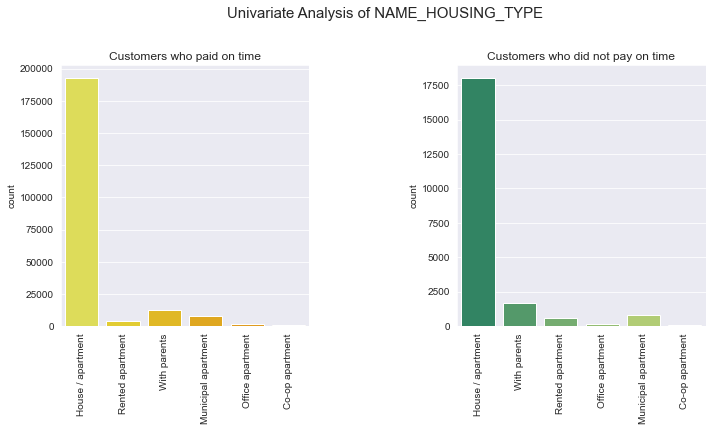

In [69]:
uni_categorical_current(col = 'NAME_HOUSING_TYPE', rot=90)

- People who own their own house/apartment tend to default too often, there are also very high number of cases where they pay on-time too.
- The ratio of 'with parents' and 'rented apartments' seem to have bigger ratio in defaulting cases.

#### `OCCUPATION_TYPE`

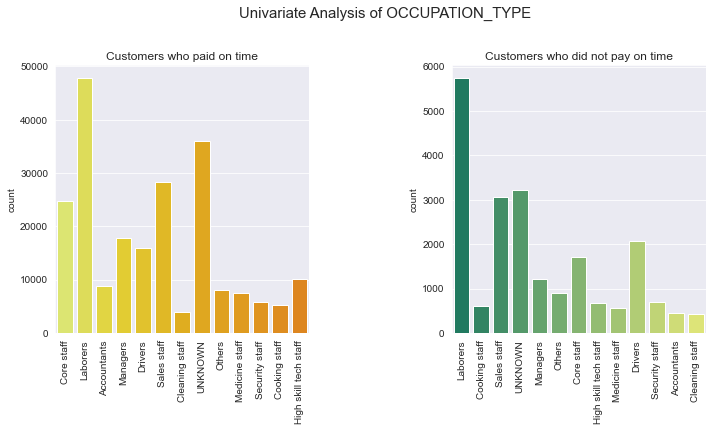

In [70]:
uni_categorical_current(col = 'OCCUPATION_TYPE', rot=90)

- We will ignore the 'UNKNOWN' category, since it was a imputaion done to avoid data loss of other values in this column
- Laborers have the highest numbers in defaulting list of occupations
- Low-skill laborers, Sales Staff, Drivers have higher numbers in defaulting data than in data of non-defaulters

#### `REGION_RATING_CLIENT`

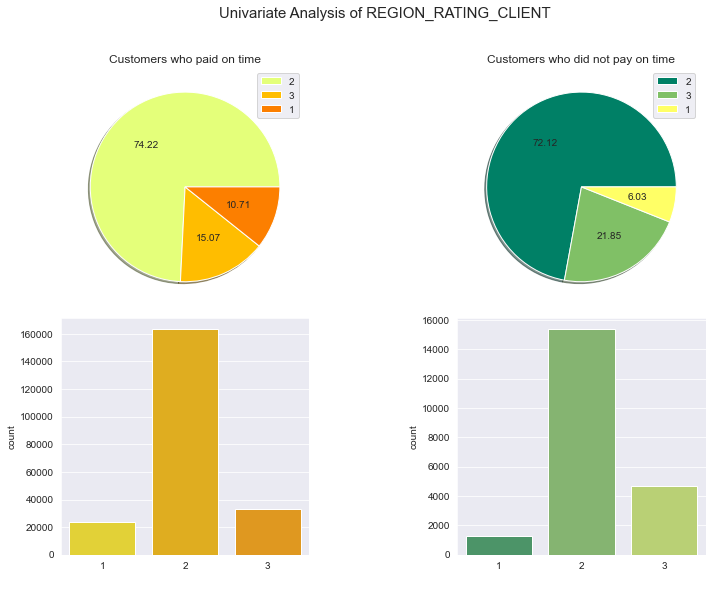

In [71]:
uni_categorical_current(col = 'REGION_RATING_CLIENT')

- People who took loans in region '1' are less in number and have the lowest ratio of not paying on time. This could indicate that people from such locations are well-off.
- People from region '3' have highers numbers in defaulting category, this could be a good indicator to identify defaulters.
- With people from region '2' having highest ratios in both the graphs, they are also similar.

#### `ORGANIZATION_TYPE`

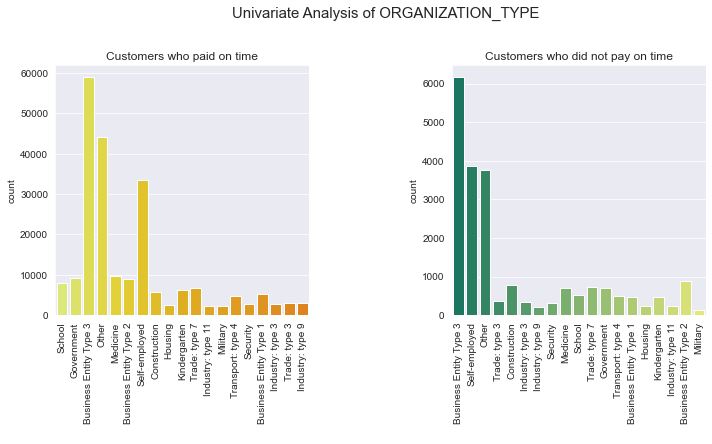

In [72]:
uni_categorical_current(col = 'ORGANIZATION_TYPE', rot=90)

- Business Entity Type 3, Self-employed and Other ar the 3 Organiation types where the default rate is high. This point could add up in our final inference.
- While most of the categories have equivalent ratios of defaulting and not-defaulting, it is difficult to infer on a single point. The best case would be to do a better check on the highest defaulting categories.

#### `REG_REGION_NOT_LIVE_REGION`

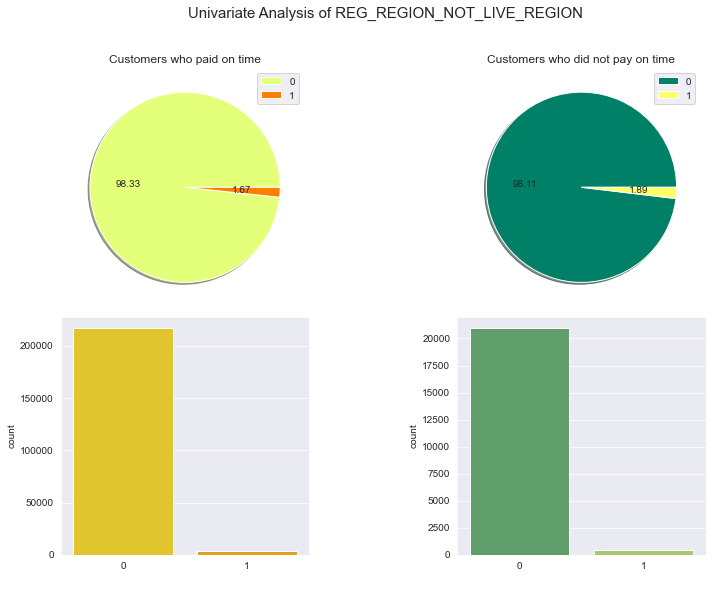

In [73]:
uni_categorical_current(col = 'REG_REGION_NOT_LIVE_REGION')

- The ratios are too similar to get inferences.
- This feature doesn't seem to be statistically significant for our analysis. (to confirm this, we can make us of hypotheses testing)

#### `DAYS_BIRTH_BIN`

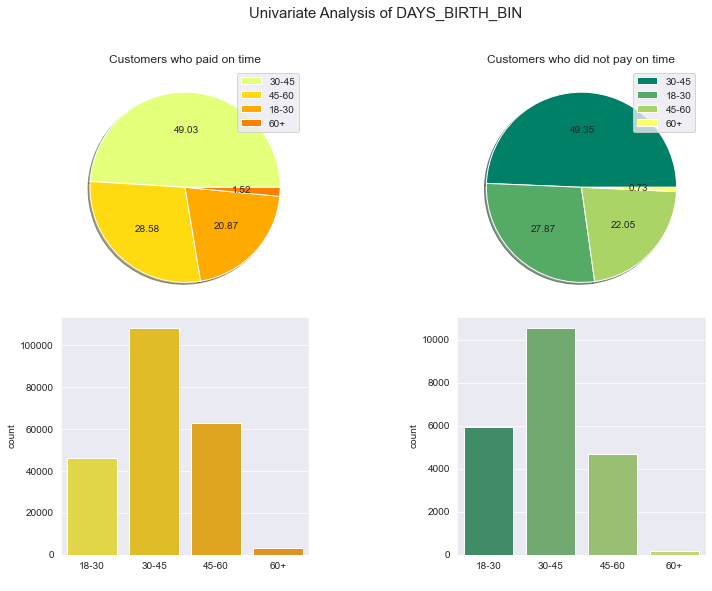

In [74]:
uni_categorical_current(col = 'DAYS_BIRTH_BIN')

- Age group of 18-30 has more numbers in defaulting than non-defaulting categories
- Ages 30-45 have the highest payment on time and also the highest defaulting rate
- Age group of 45-60 and 60+ have very low number of defaulting scenarios

#### `AMT_INCOME_TOTAL_BIN`

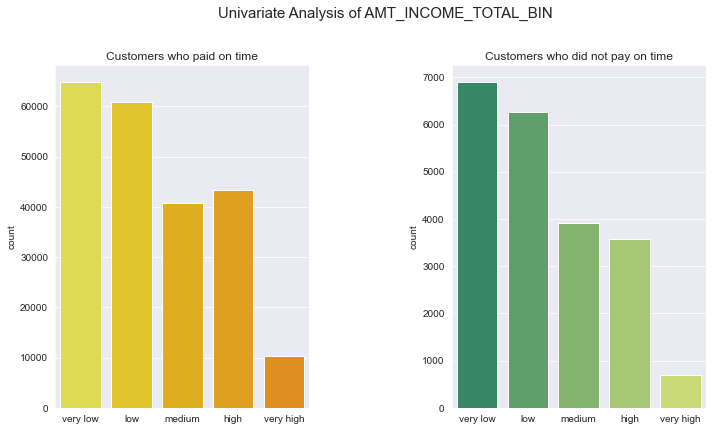

In [75]:
uni_categorical_current(col = 'AMT_INCOME_TOTAL_BIN')

- High and Very High income groups have very high number of on-time payment scenarios, and relatively less defaulters
- Very low and low income groups have pretty high range of defaulting scenario

#### `EXT_SOURCE_COMBINED_BIN`

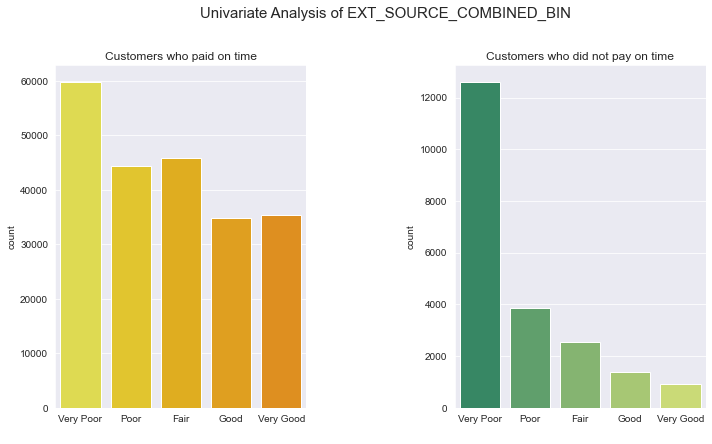

In [76]:
uni_categorical_current(col = 'EXT_SOURCE_COMBINED_BIN')

- Customers with 'Very Poor' has defaulted very often
- Rest of the people with scores in other categories have defaulted very less often
- This is an excellent indicator for detecting defaulters

#### `DAYS_EMPLOYED_BIN`

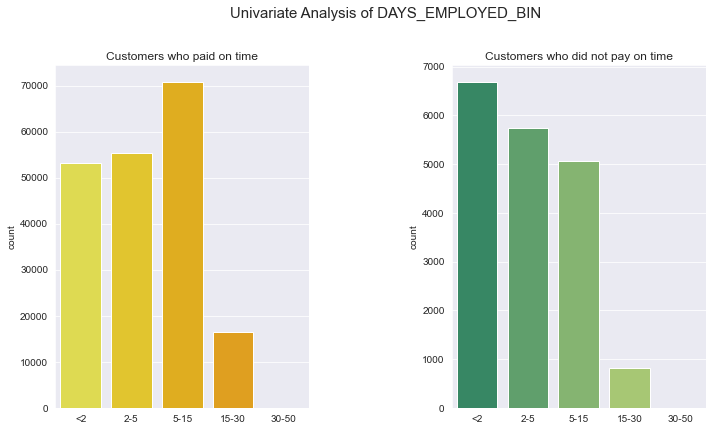

In [77]:
uni_categorical_current(col = 'DAYS_EMPLOYED_BIN')

- Clearly, people with less than 2 years of experience have defaulted most often.
- 2-5 years experienced employees have defaulted more often than on-time payments.
- All experience groups > 5 years have high on-time payment track record and least defaulting ratios.

### Correlation Analysis

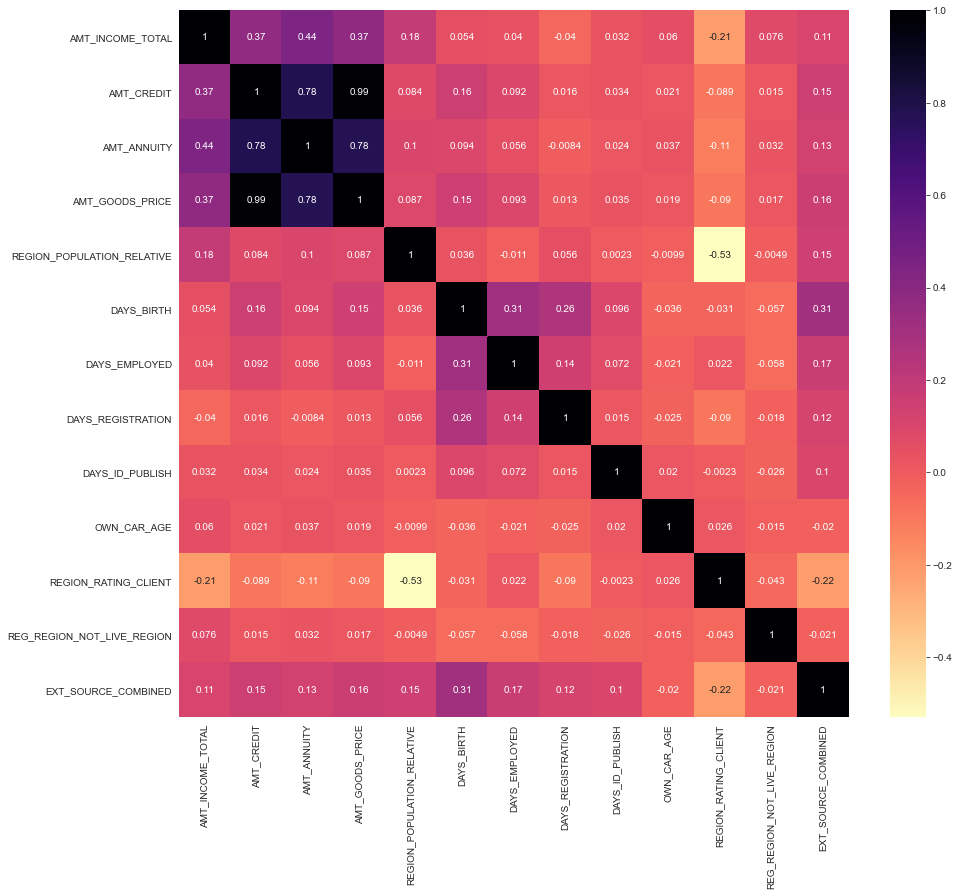

In [78]:
# Correlation Analysis of current dataset with TARGET variable as 0
plt.figure(figsize=(15,13))
sns.heatmap(current_0.drop(['SK_ID_CURR','TARGET'], axis=1).corr(), annot=True, cmap='magma_r')
plt.show()

__Top 10 _correlating_ features:__


1. `AMT_GOODS_PRICE` vs `AMT_CREDIT` = 0.99
2. `AMT_ANNUITY` vs `AMT_CREDIT` = 0.77
3. `AMT_ANNUITY` vs `AMT_GOODS_PRICE` = 0.77
4. `REGION_POPULATION_RELATIVE` vs `REGION_RATING_CLIENT` = -0.52
5. `AMT_INCOME_TOTAL` vs `AMT_ANNUITY` = 0.44
6. `AMT_INCOME_TOTAL` vs `AMT_GOODS_PRICE` = 0.38
7. `AMT_INCOME_TOTAL` vs `AMT_CREDIT` = 0.37
8. `DAYS_EMPLOYED` vs `DAYS_BIRTH` = 0.35
9. `DAYS_BIRTH` vs `EXT_SOURCE_COMBINED` = 0.31
10. `DAYS_REGISTRATION` vs `DAYS_BIRTH` = 0.3


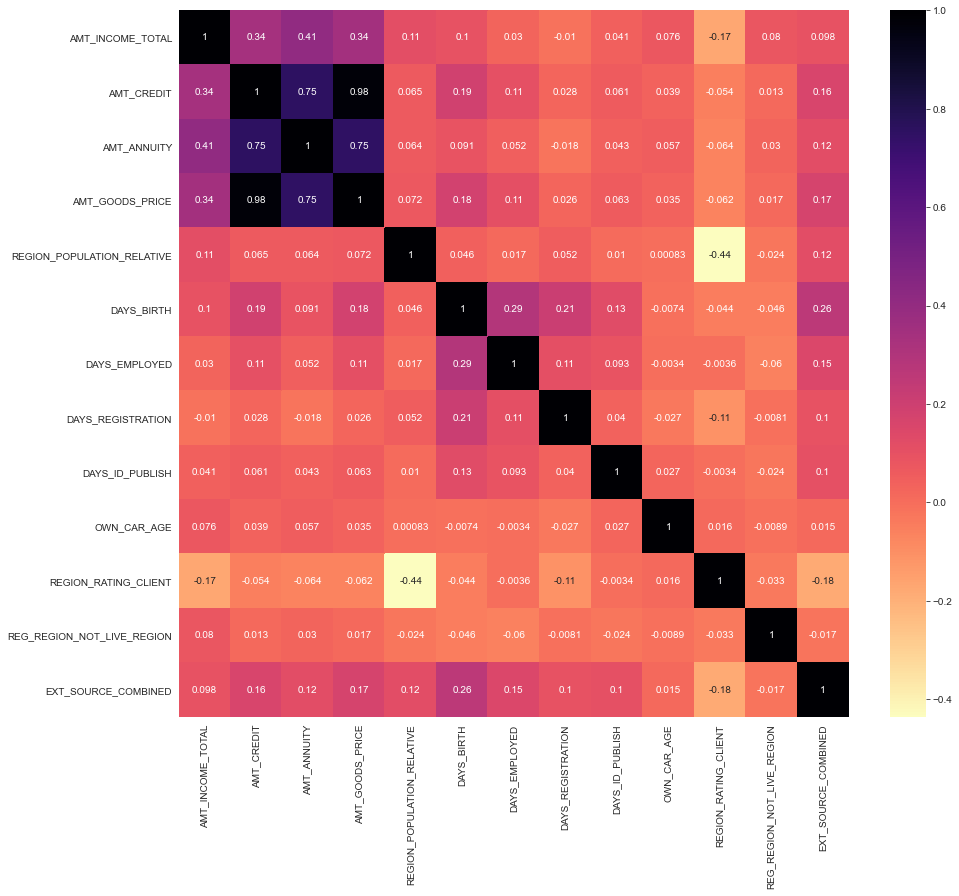

In [79]:
# Correlation Analysis of current dataset with TARGET variable as 1
plt.figure(figsize=(15,13))
sns.heatmap(current_1.drop(['SK_ID_CURR','TARGET'], axis=1).corr(), annot=True, cmap='magma_r')
plt.show()

__Top 10 _correlating_ features:__


1. `AMT_GOODS_PRICE` vs `AMT_CREDIT` = 0.98
2. `AMT_ANNUITY` vs `AMT_CREDIT` = 0.75
3. `AMT_GOODS_PRICE` vs `AMT_ANNUITY` = 0.75
4. `REGION_RATING_CLIENT` vs `REGION_POPULATION_RELATIVE` = -0.43
5. `AMT_ANNUITY` vs `AMT_INCOME_TOTAL` = 0.42
6. `AMT_CREDIT` vs `AMT_INCOME_TOTAL` = 0.34
7. `AMT_GOODS_PRICE` vs `AMT_INCOME_TOTAL` = 0.34
8. `DAYS_EMPLOYED` vs `DAYS_BIRTH` = 0.31
9. `EXT_SOURCE_COMBINED` vs `DAYS_BIRTH` = 0.26
10. `DAYS_REGISTRATION` vs `DAYS_BIRTH` = 0.24

### Continuous columns

In [80]:
#Function for Univariate analysis of continuous columns
def uni_continuous_current(col):
    '''
    col = name of the column in (" ")
    '''
    plt.figure(figsize=(14,4))
    plt.title('Univariate Analysis for '+col, fontsize=15)
    
    sns.distplot(current_0[col], label='Non-Defaulters', hist=False)
    sns.distplot(current_1[col], label='Defaulters', hist=False)
    
    plt.legend()

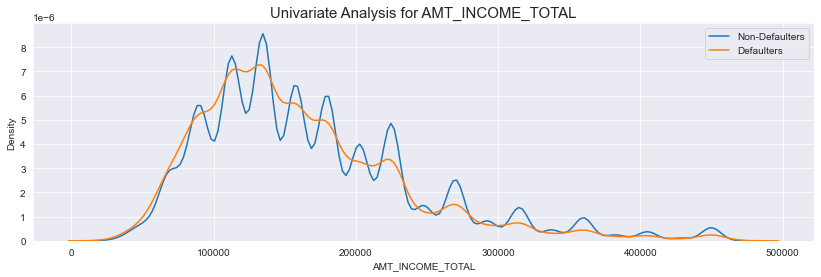

In [81]:
#AMT_INCOME_TOTAL
uni_continuous_current('AMT_INCOME_TOTAL')

- In all the points of higher-peaks, we can see that non-defaulters are lesser than defaulters.
- But, in the low-peaks, we can see that the defaulters are higher in number
- No conclusive inference can be made, but this might give us better results in bivariate/multivariate due to its variability.

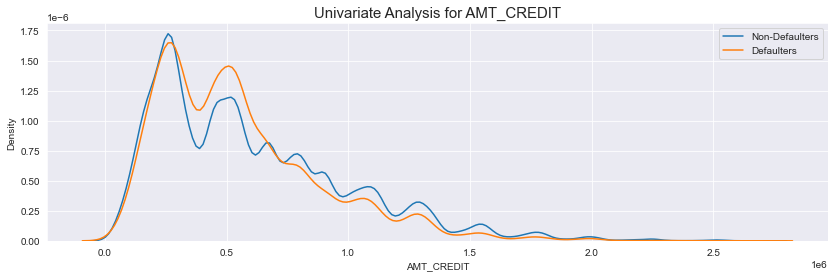

In [82]:
#AMT_CREDIT
uni_continuous_current('AMT_CREDIT')

- In the graph, before 0.7 in x-axis, there can be seen higher numbers of defaulters than non-defaulters.
- It could be inferred that people lower credit amounts tend to default more often than people with higher credit.

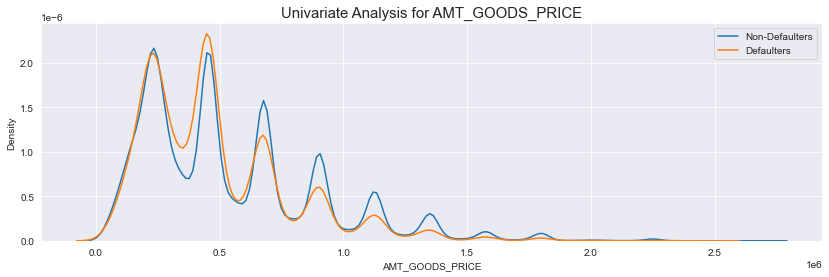

In [83]:
#AMT_GOODS_PRICE
uni_continuous_current('AMT_GOODS_PRICE')

- From it's correlation with `AMT_CREDIT`, similar inferences can be amde that below 0.7 value on x-axis, the defaulters are higher.
- People with lower goods price tend to default more often.

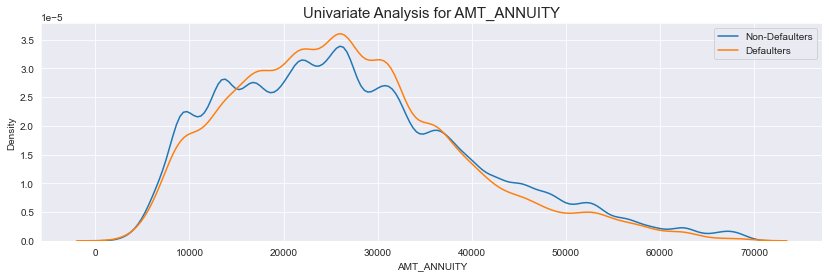

In [84]:
#AMT_ANNUITY
uni_continuous_current('AMT_ANNUITY')

- In <4000 values on x-axis, the numbers of defaulters are too often spotted.
- A clear skewness is visible towards the upper end, probably due to outliers.

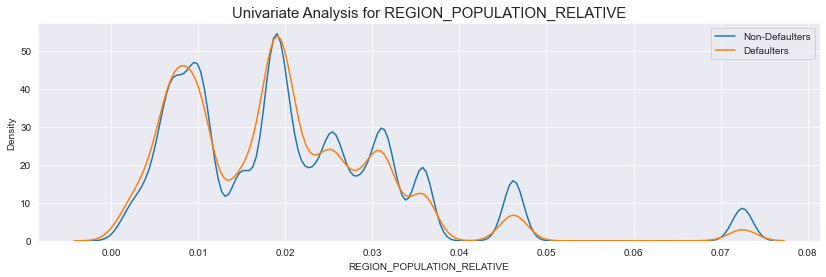

In [85]:
#REGION_POPULATION_RELATIVE
uni_continuous_current('REGION_POPULATION_RELATIVE')

- In the regions with <0.02 values, we can see the defaulters have almost similar high-peaks with non-defaulters
- The peaks for defaulters are much smaller in the values >0.02
- It can be inferred that there are more defaulters in the regions with lower population density.

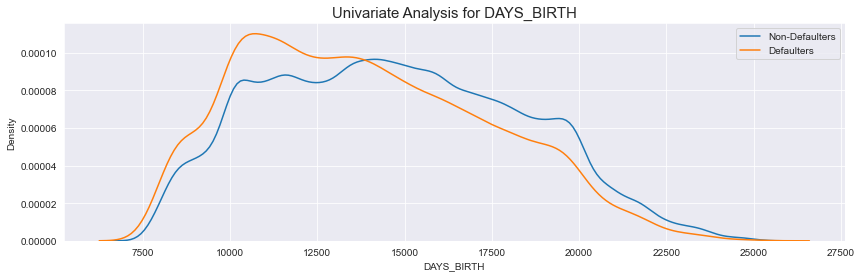

In [86]:
#DAYS_BIRTH
uni_continuous_current('DAYS_BIRTH')

- For people whose age is below ~13000 days, i.e. ~35 years, we can see that the number of defaulters is very high compared to people >35 years of age
- This seems to be highly significant for our business objective

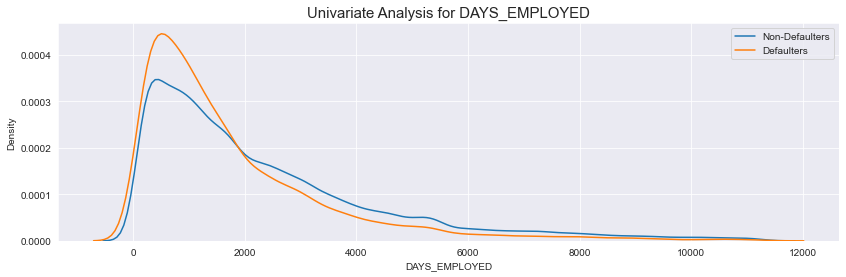

In [87]:
#DAYS_EMPLOYED
uni_continuous_current('DAYS_EMPLOYED')

- People with experience less than ~2000 years, i.e. ~5.5 years, we can see that the number of defaulters is very hgih than non-defaulters.
- This could be another major factor for our business objective

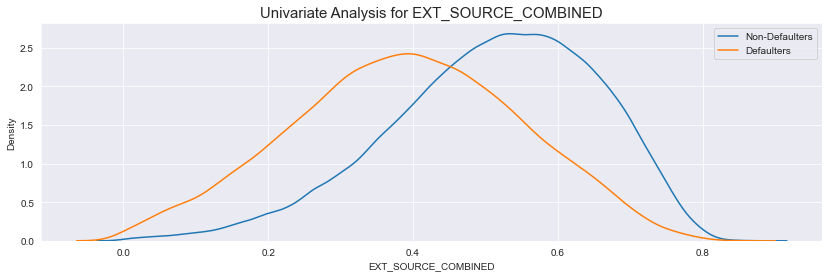

In [88]:
#EXT_SOURCE_COMBINED
uni_continuous_current('EXT_SOURCE_COMBINED')

- People who have an average external score of <0.5 can be seen to default lot more often than people who have higher scores
- This seems to be an important variable for our business objective

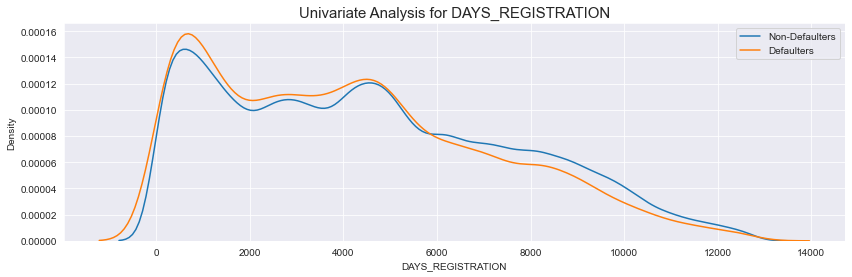

In [89]:
#DAYS_REGISTRATION
uni_continuous_current('DAYS_REGISTRATION')

- The people who changed their registerations with <~6500 days, i.e. ~17 years can be seen to default more often.

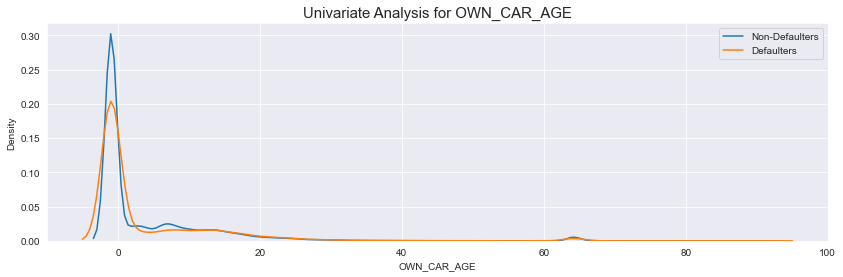

In [90]:
#OWN_CAR_AGE
uni_continuous_current('OWN_CAR_AGE')

- Due to our imputation of `-1`, which means the person does not own a car, the value falls before 0
- The values which fall before 0 have a major peak with non-defaulters having much higher value than defaulters
- Even with ratio being less, it is evident that people who dont own a car have higher defaulting numbers than the numbers of people who own their own cars

## Bivariate Analysis

In [91]:
#Function for continuous-continuous variables
def bi_cont_cont_current(col1, col2):
    '''
    col1 = Column for x-axis
    col2 = Column for y-axis
    '''
    #Subplots config
    fig, ax = plt.subplots(1,2, figsize=(10,6))
    ax = ax.flatten()
    plt.suptitle('Bivariate Analysis of '+col1+' and '+col2 , fontsize=15)
    
    #Scatterplot for TARGET = 0
    sns.scatterplot(x=current_0[col1], y=current_0[col2], ax=ax[0])
    ax[0].set_title('People who paid on time')
    
    #Scatterplot for TARGET = 1
    sns.scatterplot(x=current_1[col1], y=current_1[col2], ax=ax[1], color='orange')
    ax[1].set_title('People who did not pay on time')

#Function for continuous-categorical variables
def bi_cont_cat_current(col1, col2, rot=0):
    '''
    col1 = Use this for continuous variable if orientation is 'h'
    col1 = Use this for continuous variable if orientation is 'v'
    rot = rotation of xticks (default is 0)
    '''
    #Subplots config
    fig, ax = plt.subplots(2,2, figsize=(15,10))
    ax = ax.flatten()
    plt.suptitle('Bivariate Analysis of '+col1+' and '+col2, fontsize=15)
    
    #Boxplot for TARGET = 0
    sns.boxplot(x=current_0[col1], y=current_0[col2], ax=ax[0], color='blue')
    ax[0].set_title('People who paid on time')
    ax[0].tick_params('x',labelrotation=rot)
    
    #Boxplot for TARGET = 1
    sns.boxplot(x=current_1[col1], y=current_1[col2], ax=ax[1], color='orange')
    ax[1].set_title('People who did not pay on time')
    ax[1].tick_params('x',labelrotation=rot)
    
    #Barplot for TARGET = 0
    sns.barplot(x=current_0[col1], y=current_0[col2], ax=ax[2])
    ax[2].tick_params('x',labelrotation=rot)
    
    #Barplot for TARGET = 1
    sns.barplot(x=current_1[col1], y=current_1[col2], ax=ax[3])
    ax[3].tick_params('x',labelrotation=rot)
    
    plt.tight_layout()

#### Continuous - Continuous Variables

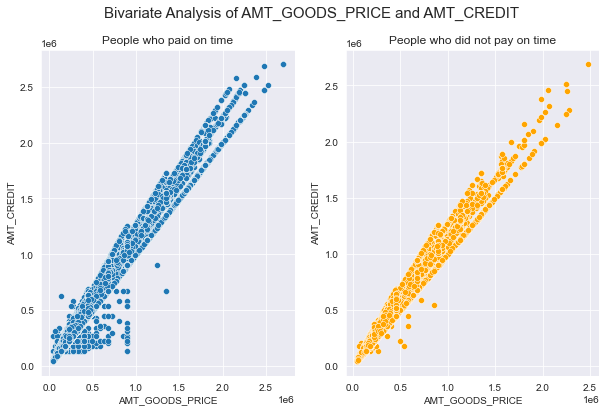

In [92]:
bi_cont_cont_current('AMT_GOODS_PRICE','AMT_CREDIT')

- These variables seem to be very highly correlated in both the situations.
- There can be seen a small cluster of points in the graph of 'people who paid on time' in the lower end from (0,0) to (1,1)

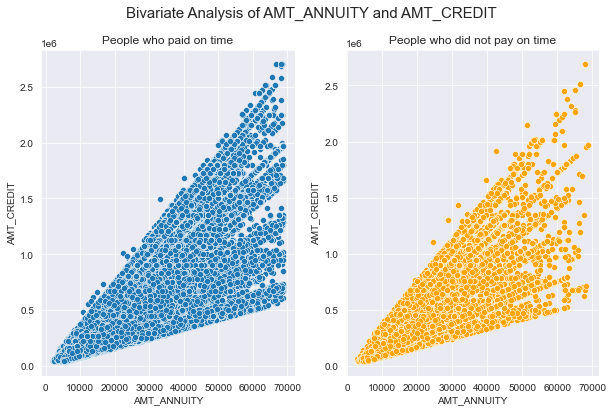

In [93]:
bi_cont_cont_current('AMT_ANNUITY','AMT_CREDIT')

- These values seem to have pretty high correlation with relatively higher variability.
- The spread of points is high in 'people who did not pay on time' graph
- This could be a point to note for further inference

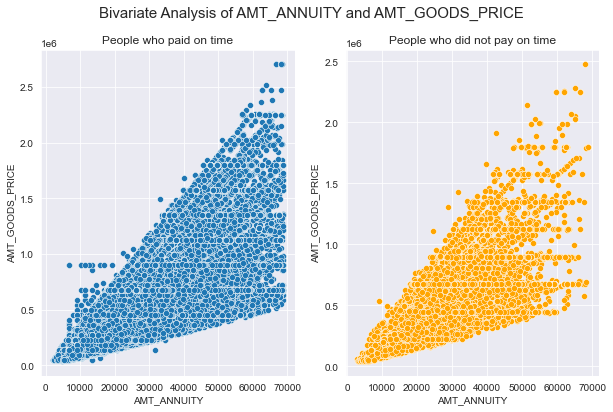

In [94]:
bi_cont_cont_current('AMT_ANNUITY','AMT_GOODS_PRICE')

- Although the linear relationships seem similar in both the plots, we can see that the values in 'did not pay on time' have lower values / relatively smaller coefficient of relationship than 'paid on time' dataset.

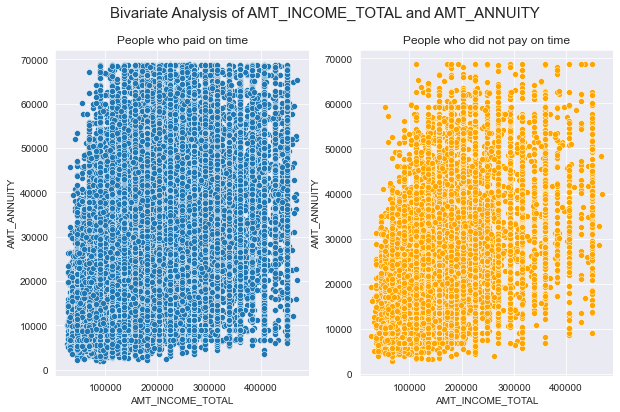

In [95]:
bi_cont_cont_current('AMT_INCOME_TOTAL','AMT_ANNUITY')

- There seems to be some kind of relationship in this case
- Not much of inference can be drawn from this

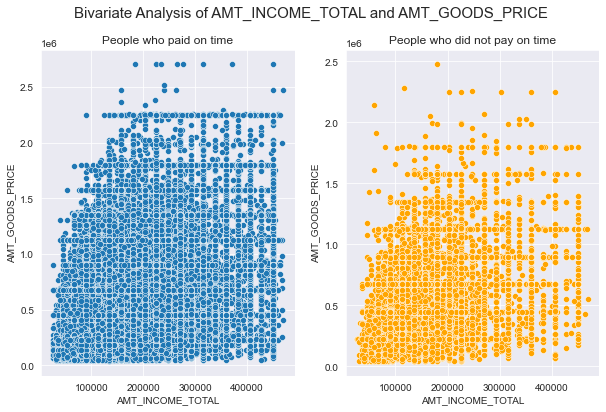

In [96]:
bi_cont_cont_current('AMT_INCOME_TOTAL','AMT_GOODS_PRICE')

- A clear static increase can be seen in income, with constant goods price in many cases. (and vice versa)
- Not much of conclusive inference can be drawn here.

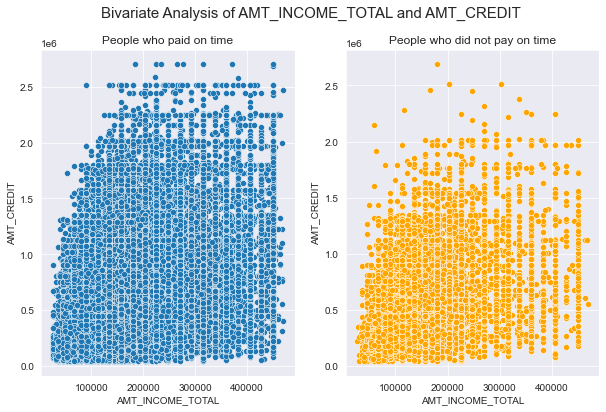

In [97]:
bi_cont_cont_current('AMT_INCOME_TOTAL','AMT_CREDIT')

- A clear static increase can be seen in income, with constant credit amount in many cases. (and vice versa)
- Not much of conclusive inference can be drawn here.

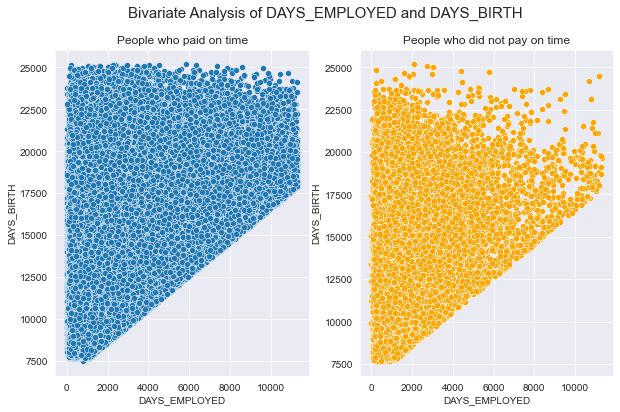

In [98]:
bi_cont_cont_current('DAYS_EMPLOYED','DAYS_BIRTH')

- We can see lesser data points in the case of 'people who did not pay on time' in the higher experience and slightly higher age sections of the graph.
- This could mean that there are very less defaulters where people had higher age and higher experience.

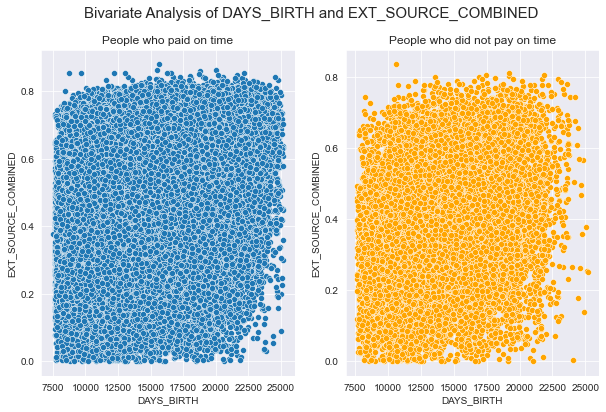

In [99]:
bi_cont_cont_current('DAYS_BIRTH','EXT_SOURCE_COMBINED')

- People from all age groups could be found in almost whole scale of EXT_SOURCES
- Elders have lesser datapoints in lower EXT_SOURCE areas of the graph of 'people who did not pay on time'

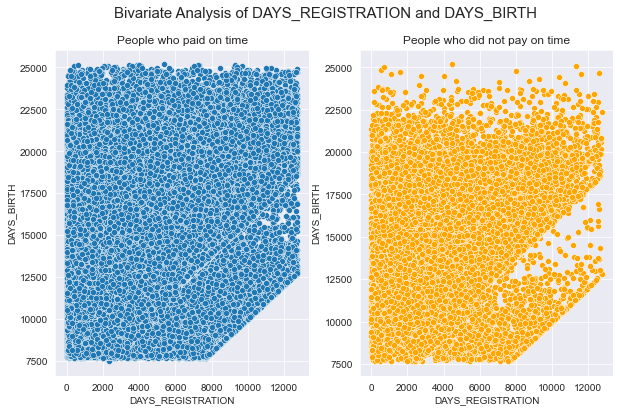

In [100]:
bi_cont_cont_current('DAYS_REGISTRATION','DAYS_BIRTH')

- Elders can be seen to apply for registeration much more earlier and take much less time than youngsters in the case of 'people who did not pay on time' graph
- This might not be relevant for our busines objective, there might be chance that this causation might have a butterfly effect towards other factors, as seen in the correlation analysis.

#### Continuous - Categorical Analysis

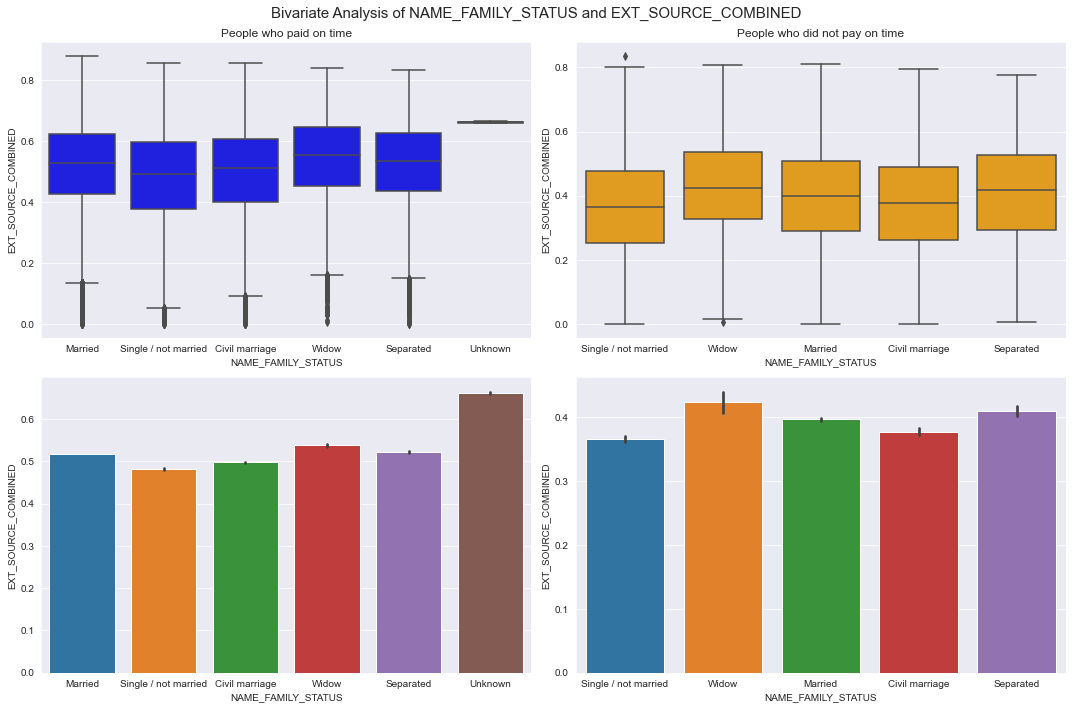

In [101]:
bi_cont_cat_current('NAME_FAMILY_STATUS','EXT_SOURCE_COMBINED')

- 'UNKNOWN' category seems to exist only among people who have paid on time.
- 'WIDOW' and 'SEPERATED' seem to be the most defaulting categories, followed by 'married'.
- EXT_SOURCE score for people who have defaulted lies ~0.4 at max

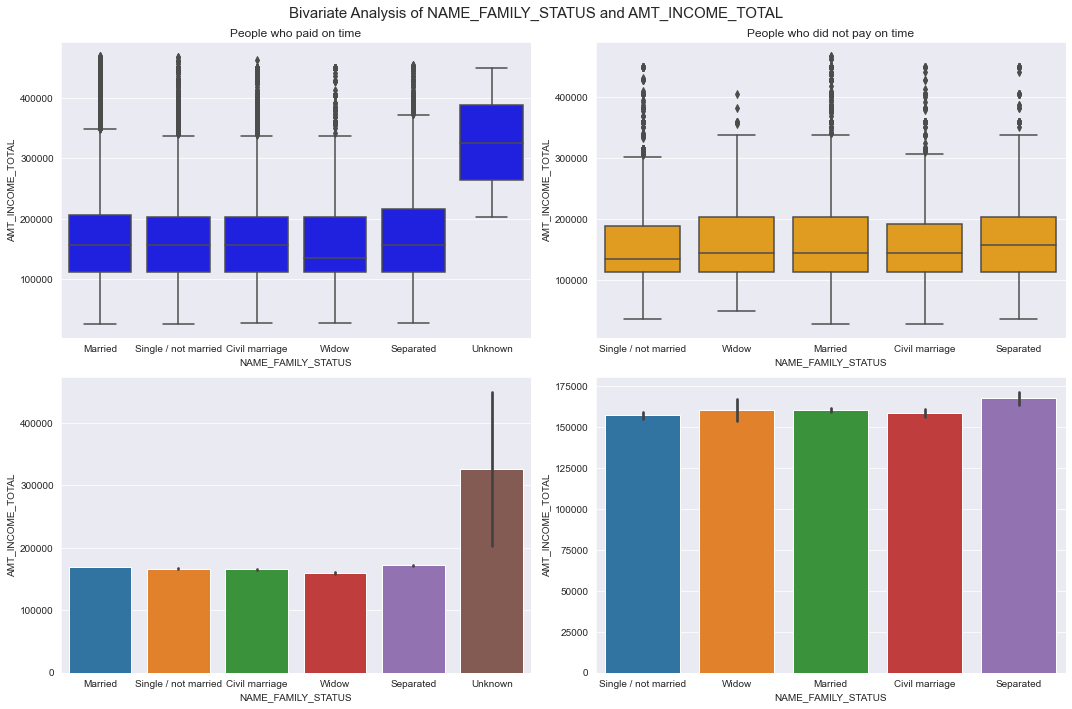

In [102]:
bi_cont_cat_current('NAME_FAMILY_STATUS','AMT_INCOME_TOTAL')

- Income below 160000 seems to be the highest salary for among defaulters, and the range lies between (150000,160000)
- All the categories are very similar in terms of income in defaulting graph

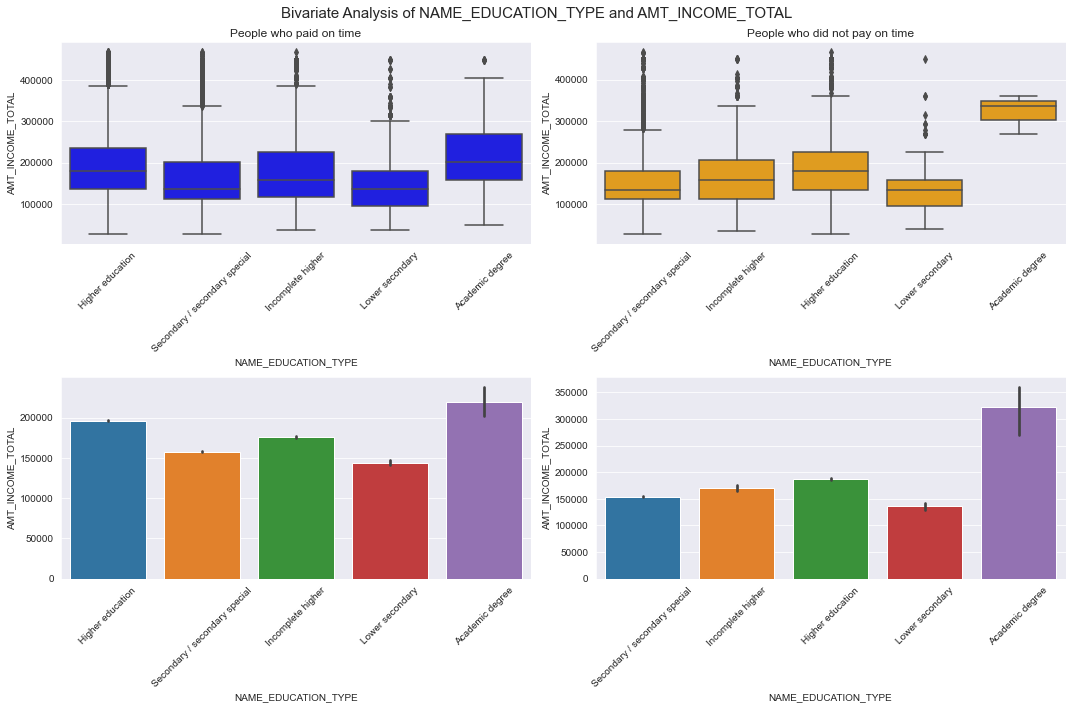

In [103]:
bi_cont_cat_current('NAME_EDUCATION_TYPE','AMT_INCOME_TOTAL', rot=45)

- People with Academic Degree are clearly the most common defaulters.
- People holding Academic degrees and having a salary of around 300000 and 350000 can also be seen to be defaulting very often, even with a higher salary


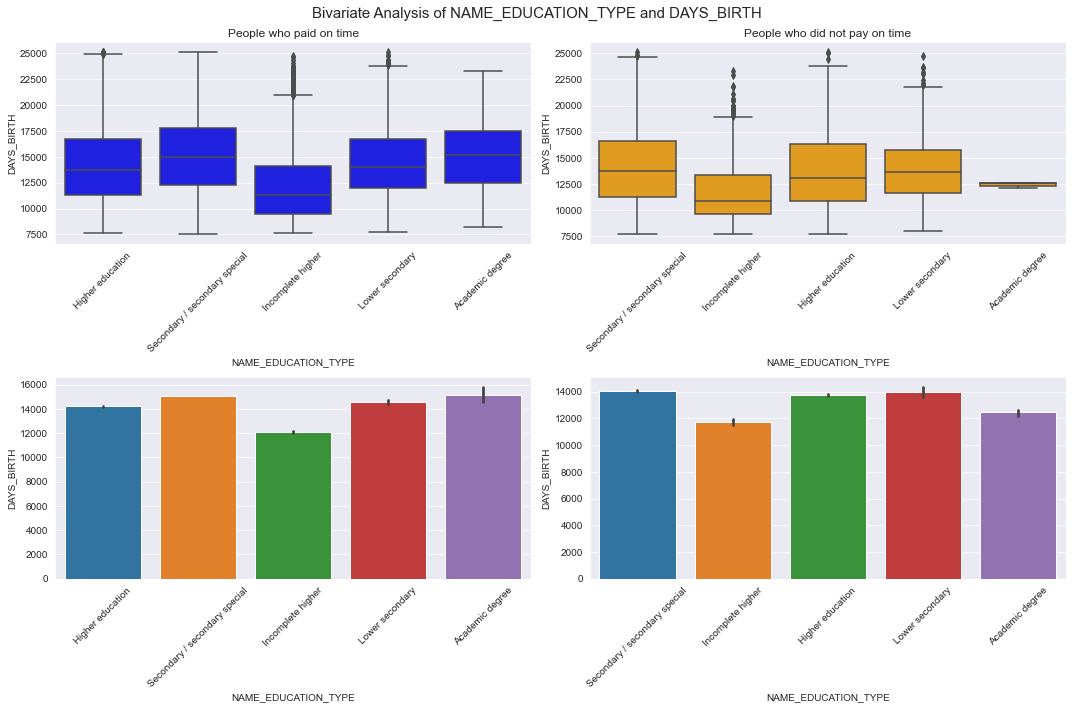

In [104]:
bi_cont_cat_current('NAME_EDUCATION_TYPE','DAYS_BIRTH', rot=45)

- Elders with 'Lower Secondary', 'Secondary/secondary special' and 'Higher Education' can be seen to default the highest
- An intersting observation is that Elders with Academic Degrees have paid on time more often

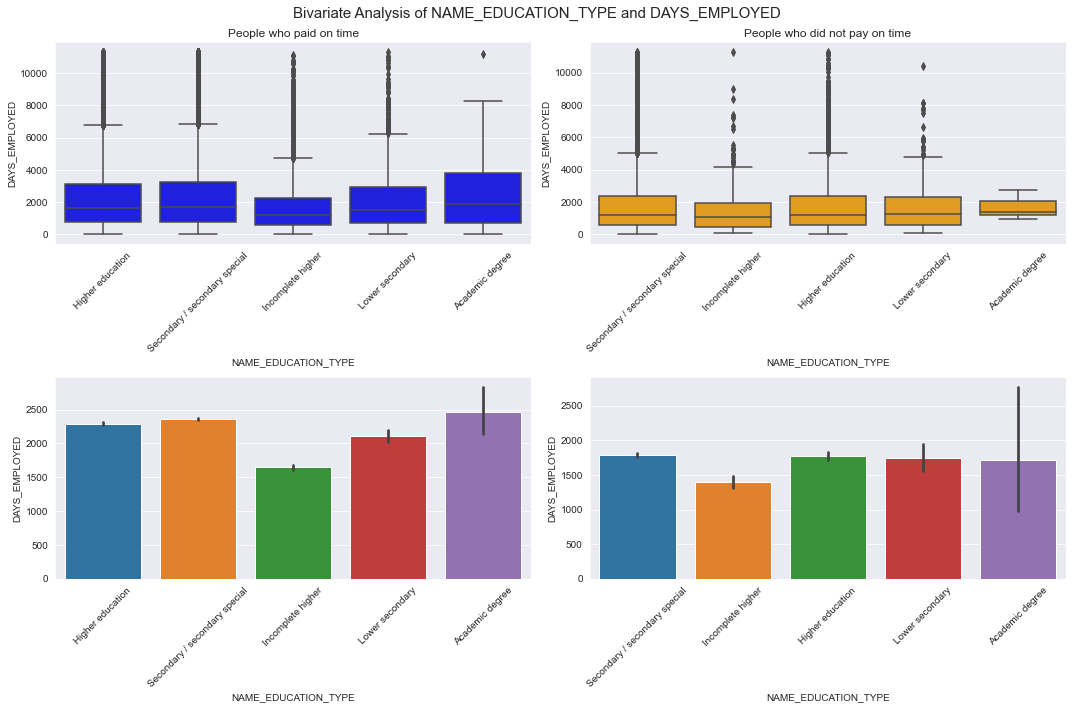

In [105]:
bi_cont_cat_current('NAME_EDUCATION_TYPE','DAYS_EMPLOYED', rot=45)

- From the plots, it can be seen that a general trend is shown where people with lower days of employment have defaulted more often, irrespective of the educational qualification they hold.

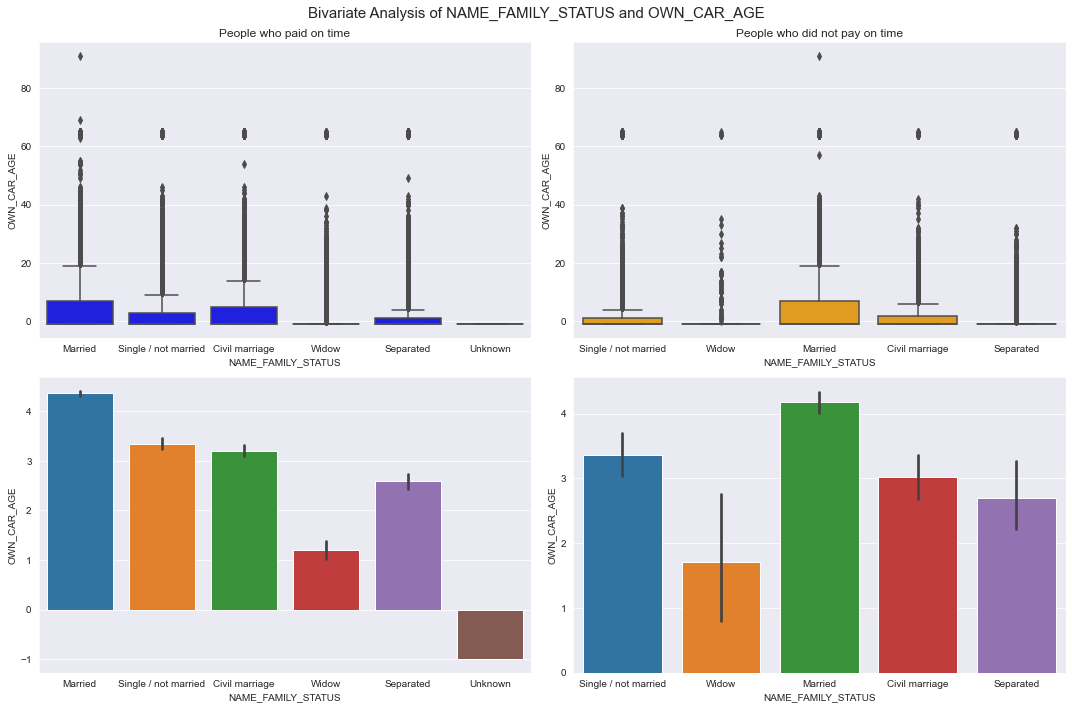

In [106]:
bi_cont_cat_current('NAME_FAMILY_STATUS','OWN_CAR_AGE')

- Married people with older cars on an average can be seen to default very often
- The category 'unknown' with -1 as value belongs to people who don't own a car

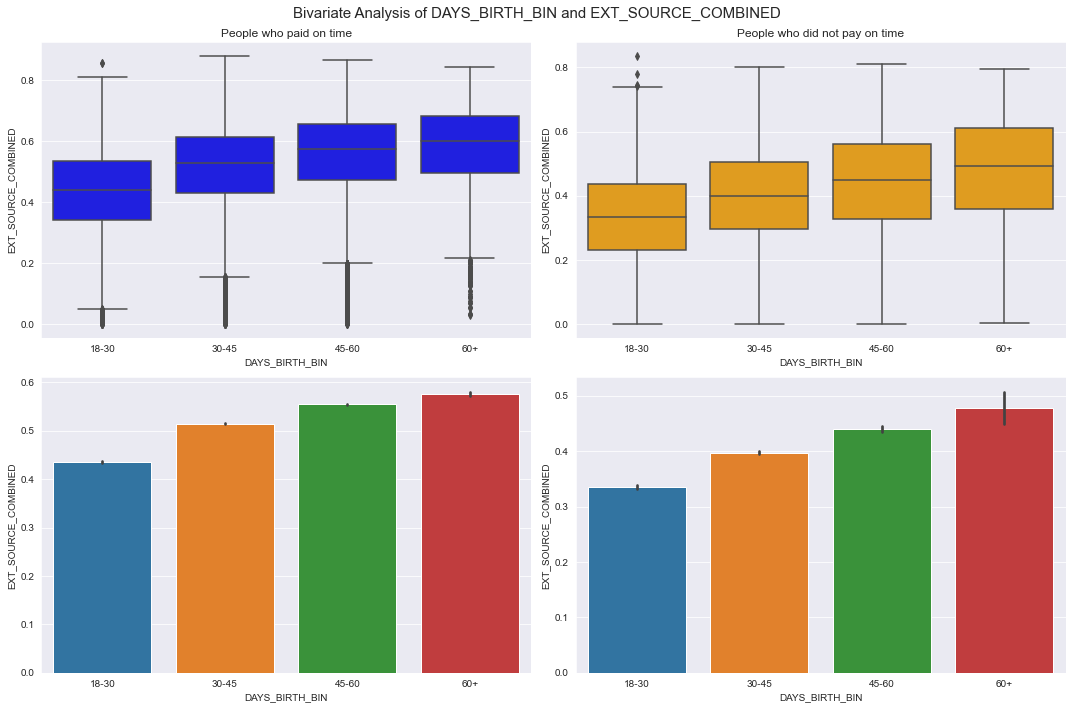

In [107]:
bi_cont_cat_current('DAYS_BIRTH_BIN','EXT_SOURCE_COMBINED')

- A common observation can be made that age is irrelevent if the score is below 0.5 (except the group of 18-30)
- 18-30 Age group has the lowest score in all the cases

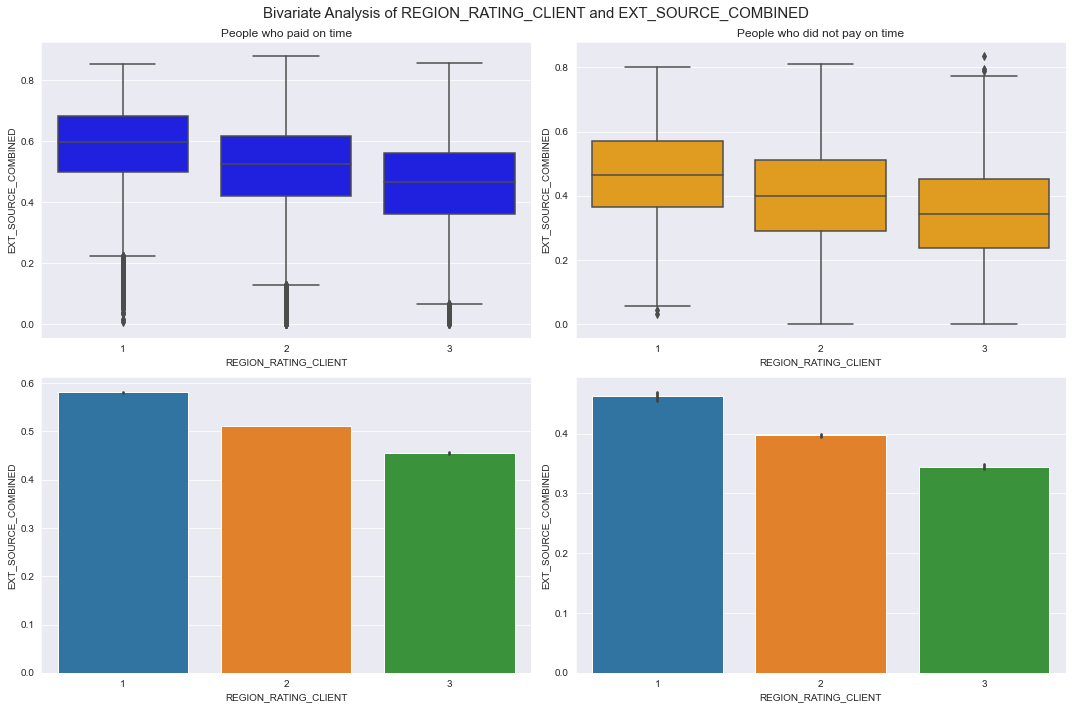

In [108]:
bi_cont_cat_current('REGION_RATING_CLIENT','EXT_SOURCE_COMBINED')

- The people who have score <0.4 and belong to region 2 and 3, they can be seen to default very often
- Score for defaulters here are again below <0.5

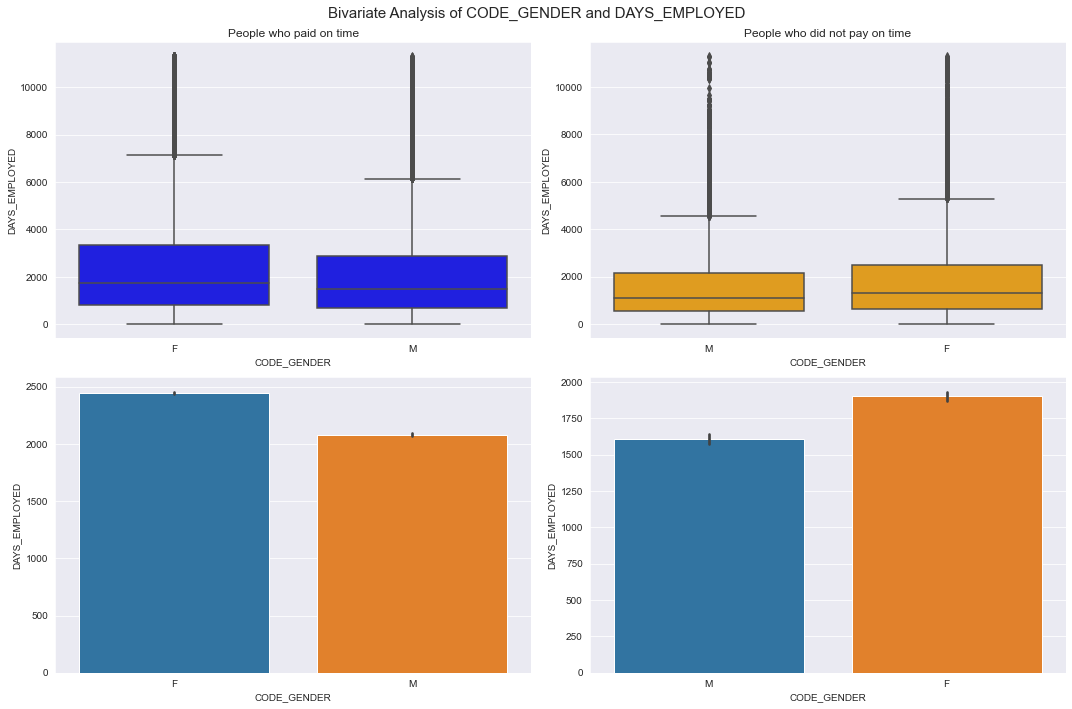

In [109]:
bi_cont_cat_current('CODE_GENDER','DAYS_EMPLOYED')

- For Male, it can be observed that <~1600 days, i.e. ~4 years, can be seen to default often
- For Female, it can be observde that <~2000 days i.e. ~5.5 years, can be seen to default often

## Multivariate Analysis

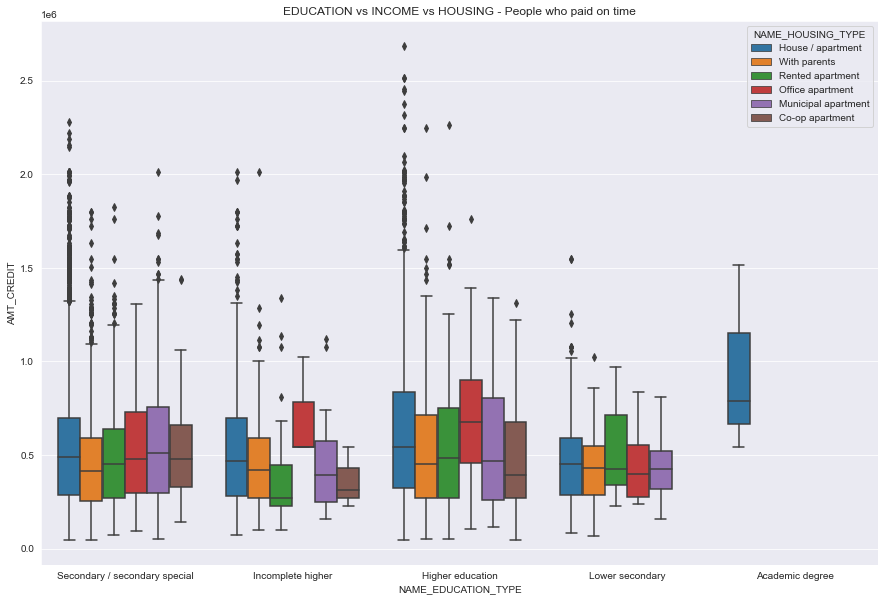

In [110]:
plt.figure(figsize=(15,10))
sns.boxplot(data=current_1, x='NAME_EDUCATION_TYPE', y='AMT_CREDIT', hue='NAME_HOUSING_TYPE')
plt.title('EDUCATION vs INCOME vs HOUSING - People who paid on time')
plt.show()

- People owning a house/apartment and an Academic degree seem to be most common defaulters
- People owning a house/apartment recieved the highest credit among defaulters.

---------------------

## Importing and Inspecting `previous` dataset

In [112]:
#Importing and taking a look at the dataset
previous = pd.read_csv('previous_application.csv')
previous.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430        17145.000   
1     2802425      108129         Cash loans    25188.615       607500.000   
2     2523466      122040         Cash loans    15060.735       112500.000   
3     2819243      176158         Cash loans    47041.335       450000.000   
4     1784265      202054         Cash loans    31924.395       337500.000   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0   17145.000             0.000        17145.000                   SATURDAY   
1  679671.000               nan       607500.000                   THURSDAY   
2  136444.500               nan       112500.000                    TUESDAY   
3  470790.000               nan       450000.000                     MONDAY   
4  404055.000               nan       337500.000                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1              0.000                  0.183   
1                       1                nan                    nan   
2                       1                nan                    nan   
3                       1                nan                    nan   
4                       1                nan                    nan   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                     0.867                    XAP             Approved   
1                       nan                    XNA             Approved   
2                       nan                    XNA             Approved   
3                       nan                    XNA             Approved   
4                       nan                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0       12.000           middle  POS mobile with interest          365243.000   
1       36.000       low_action          Cash X-Sell: low          365243.000   
2       12.000             high         Cash X-Sell: high          365243.000   
3       12.000           middle       Cash X-Sell: middle          365243.000   
4       24.000             high         Cash Street: high                 nan   

   D

In [113]:
#Shape and the information of the columns
print(previous.shape)
previous.info()

(1670214, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT           

In [114]:
#Desciption of numeric variables
previous.describe()

SK_ID_PREV  SK_ID_CURR  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  \
count 1670214.000 1670214.000  1297979.000      1670214.000 1670213.000   
mean  1923089.135  278357.174    15955.121       175233.860  196114.021   
std    532597.959  102814.824    14782.137       292779.762  318574.617   
min   1000001.000  100001.000        0.000            0.000       0.000   
25%   1461857.250  189329.000     6321.780        18720.000   24160.500   
50%   1923110.500  278714.500    11250.000        71046.000   80541.000   
75%   2384279.750  367514.000    20658.420       180360.000  216418.500   
max   2845382.000  456255.000   418058.145      6905160.000 6905160.000   

       AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  \
count        774370.000      1284699.000              1670214.000   
mean           6697.402       227847.279                   12.484   
std           20921.495       315396.558                    3.334   
min              -0.900            0.000                    0.000   
25%               0.000        50841.000                   10.000   
50%            1638.000       112320.000                   12.000   
75%            7740.000       234000.000                   15.000   
max         3060045.000      6905160.000                   23.000   

       NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
count             1670214.000         774370.000               5951.000   
mean                    0.996              0.080                  0.188   
std                     0.059              0.108                  0.088   
min                     0.000             -0.000                  0.035   
25%                     1.000              0.000                  0.161   
50%                     1.000              0.052                  0.189   
75%                     1.000              0.109                  0.193   
max                     1.000              1.000                  1.000   

       RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA  CNT_PAYMENT  \
count                  5951.000    1670214.000       1670214.000  1297984.000   
mean                      0.774       -880.680           313.951       16.054   
std                       0.101        779.100          7127.443       14.567   
min                       0.373      -2922.000            -1.000        0.000   
25%                       0.716      -1300.000            -1.000        6.000   
50%                       0.835       -581.000             3.000       12.000   
75%                       0.853       -280.000            82.000       24.000   
max                       1.000         -1.000       4000000.000       84.000   

       DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  \
count          997149.000      997149.000                 997149.000   
mean           342209.855       13826.269                  33767.774   
std             88916.116       72444.870                 106857.035   
min             -2922.000       -2892.000                  -2801.000   
25%            365243.000       -1628.000                  -1242.000   
50%            365243.000        -831.000                   -361.000   
75%            365243.000        -411.000                    129.000   
max            365243.000      365243.000                 365243.000   

       DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL  
count     997149.000        997149.000                 997149.000  
mean       76582.403         81992.344                      0.333  
std       149647.415        153303.517                      0.471  
min        -2889.000         -2874.000                      0.000  
25%        -1314.000         -1270.000                      0.000  
50%         -537.000          -499.000                      0.000  
75%          -74.000           -44.000                      1.000  
max       365243.000        365243.000                      1.000

In [115]:
#Checking % and counts of null values
pd.DataFrame((round((previous.isnull().sum() / previous.shape[0])*100, 2), previous.isnull().sum()), index=['Percentages', 'Counts']).T.sort_values('Counts', ascending=False)

Percentages      Counts
RATE_INTEREST_PRIVILEGED          99.640 1664263.000
RATE_INTEREST_PRIMARY             99.640 1664263.000
AMT_DOWN_PAYMENT                  53.640  895844.000
RATE_DOWN_PAYMENT                 53.640  895844.000
NAME_TYPE_SUITE                   49.120  820405.000
NFLAG_INSURED_ON_APPROVAL         40.300  673065.000
DAYS_TERMINATION                  40.300  673065.000
DAYS_LAST_DUE                     40.300  673065.000
DAYS_LAST_DUE_1ST_VERSION         40.300  673065.000
DAYS_FIRST_DUE                    40.300  673065.000
DAYS_FIRST_DRAWING                40.300  673065.000
AMT_GOODS_PRICE                   23.080  385515.000
AMT_ANNUITY                       22.290  372235.000
CNT_PAYMENT                       22.290  372230.000
PRODUCT_COMBINATION                0.020     346.000
AMT_CREDIT                         0.000       1.000
NAME_YIELD_GROUP                   0.000       0.000
NAME_PORTFOLIO                     0.000       0.000
NAME_SELLER_INDUSTRY               0.000       0.000
SELLERPLACE_AREA                   0.000       0.000
CHANNEL_TYPE                       0.000       0.000
NAME_PRODUCT_TYPE                  0.000       0.000
SK_ID_PREV                         0.000       0.000
NAME_GOODS_CATEGORY                0.000       0.000
NAME_CLIENT_TYPE                   0.000       0.000
CODE_REJECT_REASON                 0.000       0.000
SK_ID_CURR                         0.000       0.000
DAYS_DECISION                      0.000       0.000
NAME_CONTRACT_STATUS               0.000       0.000
NAME_CASH_LOAN_PURPOSE             0.000       0.000
NFLAG_LAST_APPL_IN_DAY             0.000       0.000
FLAG_LAST_APPL_PER_CONTRACT        0.000       0.000
HOUR_APPR_PROCESS_START            0.000       0.000
WEEKDAY_APPR_PROCESS_START         0.000       0.000
AMT_APPLICATION                    0.000       0.000
NAME_CONTRACT_TYPE                 0.000       0.000
NAME_PAYMENT_TYPE                  0.000       0.000

- We do have many columns with `>40% missing values`, these will have to be dropped.

In [118]:
#Unique categories of categorical columns
print('Unique categories of categorical columns:'+'\n'+'*'*40)
for i in previous.drop(['SK_ID_PREV','SK_ID_CURR','DAYS_DECISION','SELLERPLACE_AREA'], axis=1).select_dtypes(exclude='float64').columns:
    print(i,':\n',previous[i].unique())
    print()

Unique categories of categorical columns:
****************************************
NAME_CONTRACT_TYPE :
 ['Consumer loans' 'Cash loans' 'Revolving loans' 'XNA']

WEEKDAY_APPR_PROCESS_START :
 ['SATURDAY' 'THURSDAY' 'TUESDAY' 'MONDAY' 'FRIDAY' 'SUNDAY' 'WEDNESDAY']

HOUR_APPR_PROCESS_START :
 [15 11  7  9  8 10 12 13 14 16  6  4  5 19 17 18 20 22 21  3  1  2 23  0]

FLAG_LAST_APPL_PER_CONTRACT :
 ['Y' 'N']

NFLAG_LAST_APPL_IN_DAY :
 [1 0]

NAME_CASH_LOAN_PURPOSE :
 ['XAP' 'XNA' 'Repairs' 'Everyday expenses' 'Car repairs'
 'Building a house or an annex' 'Other' 'Journey'
 'Purchase of electronic equipment' 'Medicine' 'Payments on other loans'
 'Urgent needs' 'Buying a used car' 'Buying a new car'
 'Buying a holiday home / land' 'Education' 'Buying a home' 'Furniture'
 'Buying a garage' 'Business development' 'Wedding / gift / holiday'
 'Hobby' 'Gasification / water supply' 'Refusal to name the goal'
 'Money for a third person']

NAME_CONTRACT_STATUS :
 ['Approved' 'Refused' 'Canceled' 'U

Two categories common accross the dataset which seem to be null values:
- `XNA`
- `XAP`

In [119]:
#Replace Null values in appropriate format
previous.replace(['XNA','XAP'], np.nan, inplace=True)

#Validating the above changes
pd.DataFrame((round((previous.isnull().sum() / previous.shape[0])*100, 2), previous.isnull().sum()), index=['Percentages', 'Counts']).T.sort_values('Counts', ascending=False)

Percentages      Counts
RATE_INTEREST_PRIMARY             99.640 1664263.000
RATE_INTEREST_PRIVILEGED          99.640 1664263.000
NAME_CASH_LOAN_PURPOSE            95.830 1600579.000
CODE_REJECT_REASON                81.330 1358337.000
NAME_PRODUCT_TYPE                 63.680 1063666.000
NAME_GOODS_CATEGORY               56.930  950809.000
AMT_DOWN_PAYMENT                  53.640  895844.000
RATE_DOWN_PAYMENT                 53.640  895844.000
NAME_SELLER_INDUSTRY              51.230  855720.000
NAME_TYPE_SUITE                   49.120  820405.000
NFLAG_INSURED_ON_APPROVAL         40.300  673065.000
DAYS_TERMINATION                  40.300  673065.000
DAYS_LAST_DUE                     40.300  673065.000
DAYS_LAST_DUE_1ST_VERSION         40.300  673065.000
DAYS_FIRST_DUE                    40.300  673065.000
DAYS_FIRST_DRAWING                40.300  673065.000
NAME_PAYMENT_TYPE                 37.560  627384.000
NAME_YIELD_GROUP                  30.970  517215.000
AMT_GOODS_PRICE                   23.080  385515.000
AMT_ANNUITY                       22.290  372235.000
CNT_PAYMENT                       22.290  372230.000
NAME_PORTFOLIO                    22.290  372230.000
NAME_CLIENT_TYPE                   0.120    1941.000
NAME_CONTRACT_TYPE                 0.020     346.000
PRODUCT_COMBINATION                0.020     346.000
AMT_CREDIT                         0.000       1.000
DAYS_DECISION                      0.000       0.000
AMT_APPLICATION                    0.000       0.000
WEEKDAY_APPR_PROCESS_START         0.000       0.000
SK_ID_CURR                         0.000       0.000
SELLERPLACE_AREA                   0.000       0.000
CHANNEL_TYPE                       0.000       0.000
HOUR_APPR_PROCESS_START            0.000       0.000
FLAG_LAST_APPL_PER_CONTRACT        0.000       0.000
NFLAG_LAST_APPL_IN_DAY             0.000       0.000
NAME_CONTRACT_STATUS               0.000       0.000
SK_ID_PREV                         0.000       0.000

## Cleaning `previous` dataset

In [120]:
# Dropping columns with >49% null values
previous.drop((previous.isnull().sum()[previous.isnull().sum() > 0.49*(current.shape[0])]).index, axis=1, inplace=True)

#Shape of the dataset after dropping
previous.shape

(1670214, 15)

In [121]:
#Columns after dropping
previous.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_APPLICATION',
       'AMT_CREDIT', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_CLIENT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'PRODUCT_COMBINATION'],
      dtype='object')

In [122]:
# Removing unnecessary columns

# Dropping the unnecessary columns
previous.drop(['SK_ID_PREV','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY','DAYS_DECISION','NAME_CLIENT_TYPE',
       'SELLERPLACE_AREA','PRODUCT_COMBINATION', 'CHANNEL_TYPE'], axis=1, inplace=True)

#Printing the shape of the dataset and columns after cleaning
print(previous.shape)
print(previous.columns)

(1670214, 5)
Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_APPLICATION', 'AMT_CREDIT',
       'NAME_CONTRACT_STATUS'],
      dtype='object')


## Merging both datasets

In [123]:
# Merging both 'current' and 'previous' dataset
df_merged = previous.merge(current, on='SK_ID_CURR', suffixes=('_PREV',None))
df_merged.head()

SK_ID_CURR NAME_CONTRACT_TYPE_PREV  AMT_APPLICATION  AMT_CREDIT_PREV  \
0      271877          Consumer loans        17145.000        17145.000   
1      271877          Consumer loans      1800000.000      1754721.000   
2      271877          Consumer loans       108400.500       119848.500   
3      108129              Cash loans       607500.000       679671.000   
4      108129              Cash loans       450000.000       512370.000   

  NAME_CONTRACT_STATUS  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_REALTY  \
0             Approved       0         Cash loans           F               Y   
1              Refused       0         Cash loans           F               Y   
2             Approved       0         Cash loans           F               Y   
3             Approved       0    Revolving loans           F               N   
4             Approved       0    Revolving loans           F               N   

  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0            1        225000.000  533668.500    25803.000       477000.000   
1            1        225000.000  533668.500    25803.000       477000.000   
2            1        225000.000  533668.500    25803.000       477000.000   
3            0         90000.000  135000.000     6750.000       135000.000   
4            0         90000.000  135000.000     6750.000       135000.000   

       NAME_INCOME_TYPE            NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  \
0         State servant              Incomplete higher            Married   
1         State servant              Incomplete higher            Married   
2         State servant              Incomplete higher            Married   
3  Commercial associate  Secondary / secondary special     Civil marriage   
4  Commercial associate  Secondary / secondary special     Civil marriage   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  House / apartment                       0.046       14443           7392   
1  House / apartment                       0.046       14443           7392   
2  House / apartment                       0.046       14443           7392   
3  House / apartment                       0.025       21335           1255   
4  House / apartment                       0.025       21335           1255   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE OCCUPATION_TYPE  \
0               8447             4120           -1         UNKNOWN   
1               8447             4120           -1         UNKNOWN   
2               8447             4120           -1         UNKNOWN   
3               5455             4263           -1          Others   
4               5455             4263           -1          Others   

   REGION_RATING_CLIENT  REG_REGION_NOT_LIVE_REGION ORGANIZATION_TYPE  \
0                     1                           0          Military   
1                     1                           0          Military   
2                     1                           0          Military   
3                     2                           0     Self-employed   
4                     2                           0     Self-employed   

   EXT_SOURCE_COMBINED DAYS_BIRTH_BIN AMT_INCOME_TOTAL_BIN  \
0                0.684          30-45                 high   
1                0.684          30-45                 high   
2                0.684          30-45                 high   
3                0.664          45-60             very low   
4                0.664          45-60             very low   

  EXT_SOURCE_COMBINED_BIN DAYS_EMPLOYED_BIN  
0               Very Good             15-30  
1               Very Good             15-30  
2               Very Good             15-30  
3               Very Good               2-5  
4               Very Good               2-5

In [124]:
# Shape of merged dataset
df_merged.shape

(1094478, 33)

In [125]:
#Null values in merged dataset
pd.DataFrame((round((df_merged.isnull().sum() / df_merged.shape[0])*100, 2), df_merged.isnull().sum()), index=['Percentages', 'Counts']).T.sort_values('Counts', ascending=False)

Percentages     Counts
DAYS_EMPLOYED_BIN                 9.620 105329.000
AMT_GOODS_PRICE                   0.100   1066.000
NAME_CONTRACT_TYPE_PREV           0.030    290.000
EXT_SOURCE_COMBINED_BIN           0.020    228.000
EXT_SOURCE_COMBINED               0.020    228.000
CODE_GENDER                       0.010     55.000
OWN_CAR_AGE                       0.000      0.000
DAYS_EMPLOYED                     0.000      0.000
DAYS_REGISTRATION                 0.000      0.000
DAYS_ID_PUBLISH                   0.000      0.000
REGION_RATING_CLIENT              0.000      0.000
OCCUPATION_TYPE                   0.000      0.000
REGION_POPULATION_RELATIVE        0.000      0.000
REG_REGION_NOT_LIVE_REGION        0.000      0.000
ORGANIZATION_TYPE                 0.000      0.000
DAYS_BIRTH_BIN                    0.000      0.000
AMT_INCOME_TOTAL_BIN              0.000      0.000
DAYS_BIRTH                        0.000      0.000
SK_ID_CURR                        0.000      0.000
NAME_HOUSING_TYPE                 0.000      0.000
NAME_EDUCATION_TYPE               0.000      0.000
NAME_INCOME_TYPE                  0.000      0.000
AMT_ANNUITY                       0.000      0.000
AMT_CREDIT                        0.000      0.000
AMT_INCOME_TOTAL                  0.000      0.000
CNT_CHILDREN                      0.000      0.000
FLAG_OWN_REALTY                   0.000      0.000
NAME_CONTRACT_TYPE                0.000      0.000
TARGET                            0.000      0.000
NAME_CONTRACT_STATUS              0.000      0.000
AMT_CREDIT_PREV                   0.000      0.000
AMT_APPLICATION                   0.000      0.000
NAME_FAMILY_STATUS                0.000      0.000

- Null values in `DAYS_EMPLOYED_BIN` can be imputed using mode.
- The rest of the null values can be dropped due to a small % of missing values, which will not affect our analysis by much.

In [126]:
# Dropping unnecessary columns
df_merged.drop(['SK_ID_CURR'], axis=1, inplace=True)
print(df_merged.shape)
print(df_merged.columns)

(1094478, 32)
Index(['NAME_CONTRACT_TYPE_PREV', 'AMT_APPLICATION', 'AMT_CREDIT_PREV',
       'NAME_CONTRACT_STATUS', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'OCCUPATION_TYPE', 'REGION_RATING_CLIENT', 'REG_REGION_NOT_LIVE_REGION',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_COMBINED', 'DAYS_BIRTH_BIN',
       'AMT_INCOME_TOTAL_BIN', 'EXT_SOURCE_COMBINED_BIN', 'DAYS_EMPLOYED_BIN'],
      dtype='object')


In [140]:
#Imputing with mode for 'DAYS_EMPLOYED_BIN'
df_merged['DAYS_EMPLOYED_BIN'] = df_merged['DAYS_EMPLOYED_BIN'].fillna(df_merged['DAYS_EMPLOYED_BIN'].mode().values[0])

#Validating the above
df_merged['DAYS_EMPLOYED_BIN'].value_counts(dropna=False)

5-15     474679
2-5      283359
<2       258077
15-30     78343
30-50        20
Name: DAYS_EMPLOYED_BIN, dtype: int64

In [147]:
#Dropping the rest of the rows with missing values
df_merged = df_merged.dropna(subset=['AMT_GOODS_PRICE','NAME_CONTRACT_TYPE_PREV','EXT_SOURCE_COMBINED_BIN','EXT_SOURCE_COMBINED','CODE_GENDER'])

#### Checking data

In [148]:
df_merged.head()

NAME_CONTRACT_TYPE_PREV  AMT_APPLICATION  AMT_CREDIT_PREV  \
0          Consumer loans        17145.000        17145.000   
1          Consumer loans      1800000.000      1754721.000   
2          Consumer loans       108400.500       119848.500   
3              Cash loans       607500.000       679671.000   
4              Cash loans       450000.000       512370.000   

  NAME_CONTRACT_STATUS  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_REALTY  \
0             Approved       0         Cash loans           F               Y   
1              Refused       0         Cash loans           F               Y   
2             Approved       0         Cash loans           F               Y   
3             Approved       0    Revolving loans           F               N   
4             Approved       0    Revolving loans           F               N   

  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0            1        225000.000  533668.500    25803.000       477000.000   
1            1        225000.000  533668.500    25803.000       477000.000   
2            1        225000.000  533668.500    25803.000       477000.000   
3            0         90000.000  135000.000     6750.000       135000.000   
4            0         90000.000  135000.000     6750.000       135000.000   

       NAME_INCOME_TYPE            NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  \
0         State servant              Incomplete higher            Married   
1         State servant              Incomplete higher            Married   
2         State servant              Incomplete higher            Married   
3  Commercial associate  Secondary / secondary special     Civil marriage   
4  Commercial associate  Secondary / secondary special     Civil marriage   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  House / apartment                       0.046       14443           7392   
1  House / apartment                       0.046       14443           7392   
2  House / apartment                       0.046       14443           7392   
3  House / apartment                       0.025       21335           1255   
4  House / apartment                       0.025       21335           1255   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE OCCUPATION_TYPE  \
0               8447             4120           -1         UNKNOWN   
1               8447             4120           -1         UNKNOWN   
2               8447             4120           -1         UNKNOWN   
3               5455             4263           -1          Others   
4               5455             4263           -1          Others   

   REGION_RATING_CLIENT  REG_REGION_NOT_LIVE_REGION ORGANIZATION_TYPE  \
0                     1                           0          Military   
1                     1                           0          Military   
2                     1                           0          Military   
3                     2                           0     Self-employed   
4                     2                           0     Self-employed   

   EXT_SOURCE_COMBINED DAYS_BIRTH_BIN AMT_INCOME_TOTAL_BIN  \
0                0.684          30-45                 high   
1                0.684          30-45                 high   
2                0.684          30-45                 high   
3                0.664          45-60             very low   
4                0.664          45-60             very low   

  EXT_SOURCE_COMBINED_BIN DAYS_EMPLOYED_BIN  
0               Very Good             15-30  
1               Very Good             15-30  
2               Very Good             15-30  
3               Very Good               2-5  
4               Very Good               2-5

In [149]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1092841 entries, 0 to 1094477
Data columns (total 32 columns):
 #   Column                      Non-Null Count    Dtype   
---  ------                      --------------    -----   
 0   NAME_CONTRACT_TYPE_PREV     1092841 non-null  object  
 1   AMT_APPLICATION             1092841 non-null  float64 
 2   AMT_CREDIT_PREV             1092841 non-null  float64 
 3   NAME_CONTRACT_STATUS        1092841 non-null  object  
 4   TARGET                      1092841 non-null  int64   
 5   NAME_CONTRACT_TYPE          1092841 non-null  object  
 6   CODE_GENDER                 1092841 non-null  object  
 7   FLAG_OWN_REALTY             1092841 non-null  object  
 8   CNT_CHILDREN                1092841 non-null  object  
 9   AMT_INCOME_TOTAL            1092841 non-null  float64 
 10  AMT_CREDIT                  1092841 non-null  float64 
 11  AMT_ANNUITY                 1092841 non-null  float64 
 12  AMT_GOODS_PRICE             1092841 non-nu

All the categories seem to be in appropriate datatypes. We will proceed with analysis.

### Outlier Analysis

##### AMT_APPLICATION

count   1092841.000
mean     170116.394
std      289712.278
min           0.000
5%            0.000
25%       20655.000
50%       67500.000
75%      180000.000
90%      450000.000
95%      765000.000
99%     1350000.000
max     4455000.000
Name: AMT_APPLICATION, dtype: float64


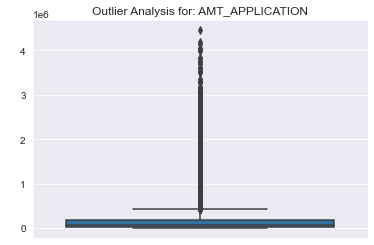

In [151]:
outlier_check(df_merged, 'AMT_APPLICATION')

- Based on the above information, the values above 95th perentile can be dropped due to extremely rare occurence.

count   1035630.000
mean     114716.857
std      147075.815
min           0.000
5%            0.000
25%       17905.500
50%       62955.000
75%      141750.000
90%      315000.000
95%      450000.000
99%      675000.000
max      764955.000
Name: AMT_APPLICATION, dtype: float64


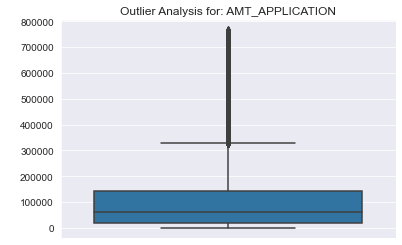

In [154]:
#Dropping the top 5 percentile values
df_merged = df_merged[df_merged['AMT_APPLICATION']<df_merged['AMT_APPLICATION'].quantile(0.95)]

#Validating the above changes
outlier_check(df_merged, 'AMT_APPLICATION')

Many outliers can still be spotted, but the range of values is still acceptable for analysis

##### AMT_CREDIT_PREV

count   1035630.000
mean     132739.237
std      169703.672
min           0.000
5%            0.000
25%       23485.500
50%       69727.500
75%      166860.000
90%      376483.500
95%      518562.000
99%      765000.000
max     1350000.000
Name: AMT_CREDIT_PREV, dtype: float64


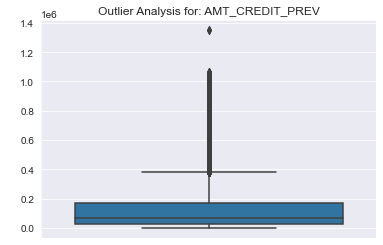

In [155]:
outlier_check(df_merged, 'AMT_CREDIT_PREV')

- Many outliers can be spotted in this case too
- Based on the percentile information, top 5 percentile values can be dropped.

count   983777.000
mean    104564.984
std     117695.221
min          0.000
5%           0.000
25%      21433.500
50%      63733.500
75%     143910.000
90%     270000.000
95%     384277.500
99%     490495.500
max     518557.500
Name: AMT_CREDIT_PREV, dtype: float64


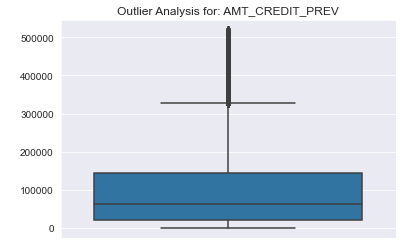

In [156]:
#Dropping the top 5 percentile values
df_merged = df_merged[df_merged['AMT_CREDIT_PREV']<df_merged['AMT_CREDIT_PREV'].quantile(0.95)]

#Validating the above changes
outlier_check(df_merged, 'AMT_CREDIT_PREV')

Outliers can still be spotted based on the boxplot, but values are in acceptable range.

## Univariate Analysis

Percentage of categories:
 Consumer loans    51.334
Cash loans        36.166
Revolving loans   12.500
Name: NAME_CONTRACT_TYPE_PREV, dtype: float64


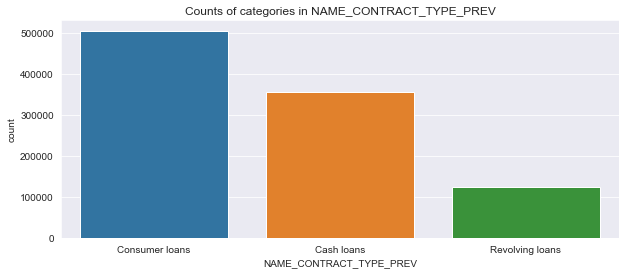

In [157]:
print('Percentage of categories:\n',df_merged['NAME_CONTRACT_TYPE_PREV'].value_counts(normalize=True)*100)
plt.figure(figsize=(10,4))
sns.countplot(df_merged['NAME_CONTRACT_TYPE_PREV'])
plt.title('Counts of categories in NAME_CONTRACT_TYPE_PREV')
plt.show()

- We can see that the highest loans were consumer loans with 46% and the least were revolving loans 12%

Percentage of categories:
 Approved       63.630
Canceled       19.213
Refused        15.104
Unused offer    2.054
Name: NAME_CONTRACT_STATUS, dtype: float64


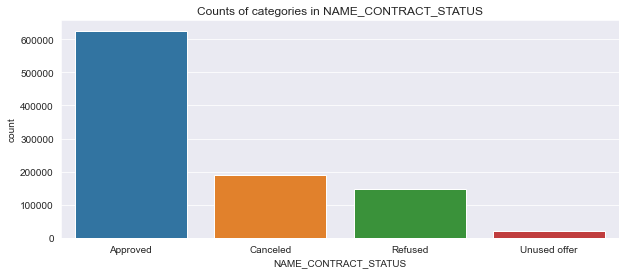

In [158]:
print('Percentage of categories:\n',df_merged['NAME_CONTRACT_STATUS'].value_counts(normalize=True)*100)
plt.figure(figsize=(10,4))
sns.countplot(df_merged['NAME_CONTRACT_STATUS'])
plt.title('Counts of categories in NAME_CONTRACT_STATUS')
plt.show()

- Unused offer is the least available in the dataset with ~2%
- Most of the contracts were approved with 62%
- Refused and Cancelled stand almost similar with ~17% values

Description of column:
 count   983777.000
mean    104564.984
std     117695.221
min          0.000
25%      21433.500
50%      63733.500
75%     143910.000
max     518557.500
Name: AMT_CREDIT_PREV, dtype: float64


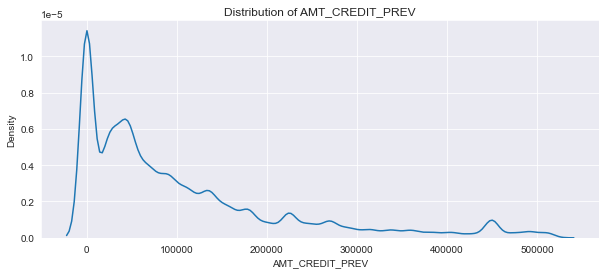

In [159]:
print('Description of column:\n',df_merged['AMT_CREDIT_PREV'].describe())
plt.figure(figsize=(10,4))
sns.distplot(df_merged['AMT_CREDIT_PREV'], hist=False)
plt.title('Distribution of AMT_CREDIT_PREV')
plt.show()

- The data is clearly very heavily skewed. Seems that there are some outliers present in the data.
- There seems to a huge peak around 0, which might indicate that majority of data lies in the lower amount.

Description of column:
 count   983777.000
mean     92599.490
std     105980.974
min          0.000
25%      15286.500
50%      57267.000
75%     135000.000
max     761796.000
Name: AMT_APPLICATION, dtype: float64


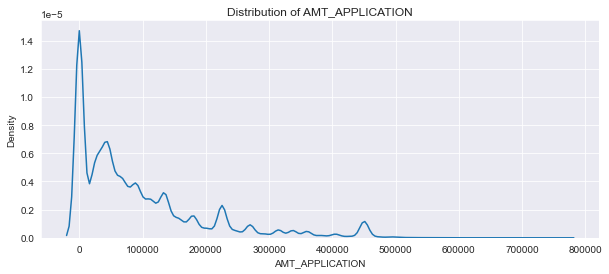

In [160]:
print('Description of column:\n',df_merged['AMT_APPLICATION'].describe())
plt.figure(figsize=(10,4))
sns.distplot(df_merged['AMT_APPLICATION'], hist=False)
plt.title('Distribution of AMT_APPLICATION')
plt.show()

- The skewewness is drastic in this plot too
- Based on the previous plot of amount credited, it is safe to suggest that outlier amount of credit is valid due to similar values seen in this plot where amount applied is shown

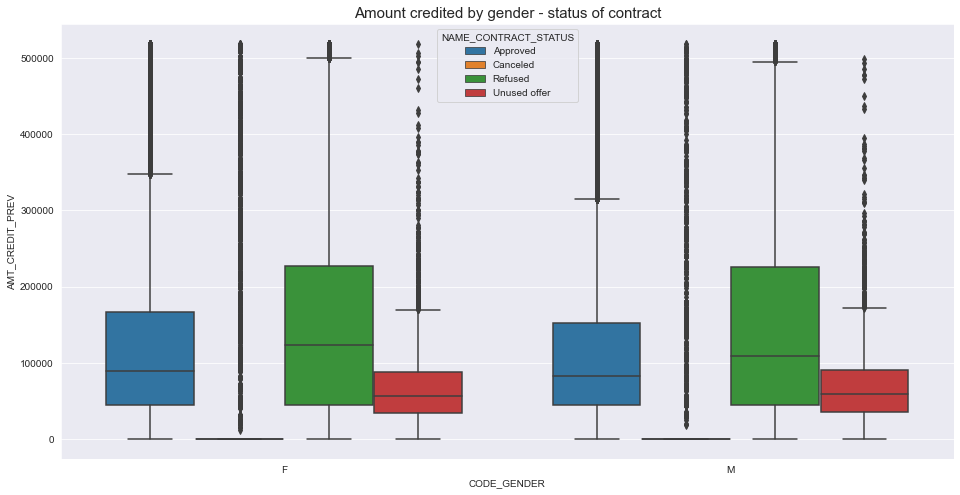

In [161]:
plt.figure(figsize=(16,8))
plt.title('Amount credited by gender - status of contract', fontsize=15)
sns.boxplot(data=df_merged, x='CODE_GENDER', y='AMT_CREDIT_PREV', hue='NAME_CONTRACT_STATUS')
plt.show()

- There is no significant difference that can be seen between both the genders

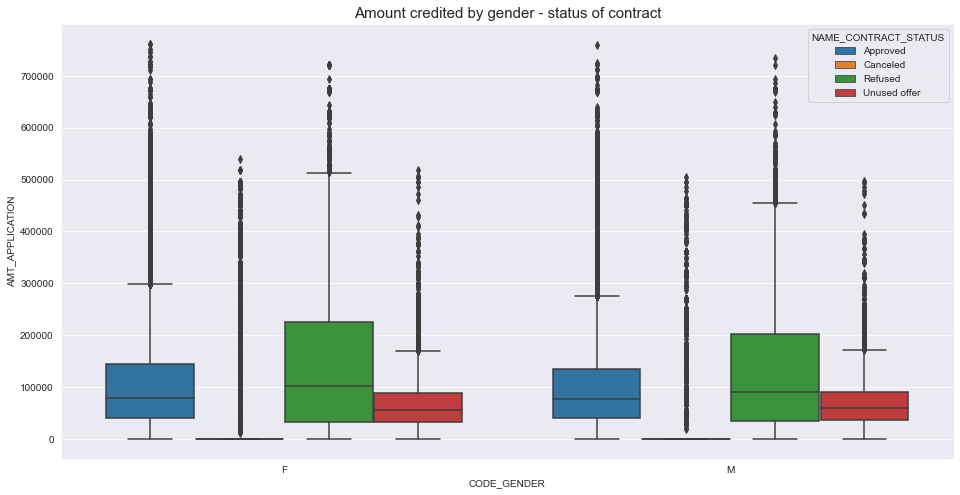

In [162]:
plt.figure(figsize=(16,8))
plt.title('Amount credited by gender - status of contract', fontsize=15)
sns.boxplot(data=df_merged, x='CODE_GENDER', y='AMT_APPLICATION', hue='NAME_CONTRACT_STATUS')
plt.show()

- There seems to be lesser refused offers for MALE gender

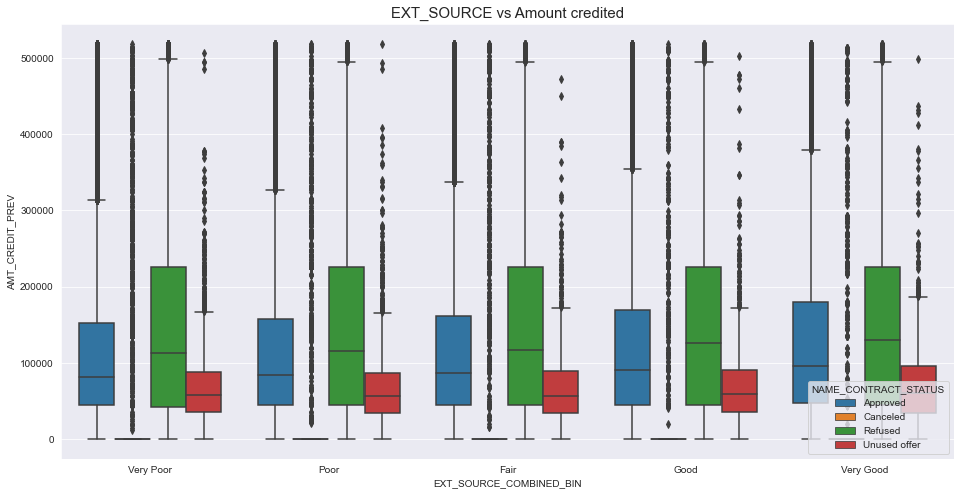

In [163]:
#EXT_SOURCE_COMBINED vs AMT_CREDIT_PREV
plt.figure(figsize=(16,8))
plt.title('EXT_SOURCE vs Amount credited', fontsize=15)
sns.boxplot(data=df_merged, x='EXT_SOURCE_COMBINED_BIN', y='AMT_CREDIT_PREV', hue='NAME_CONTRACT_STATUS')
plt.show()

- The credit amount is very similar for all score groups
- Surprisingly, the credit amount is higher for people in 'very poor','poor' categories than 'fair' and 'good'

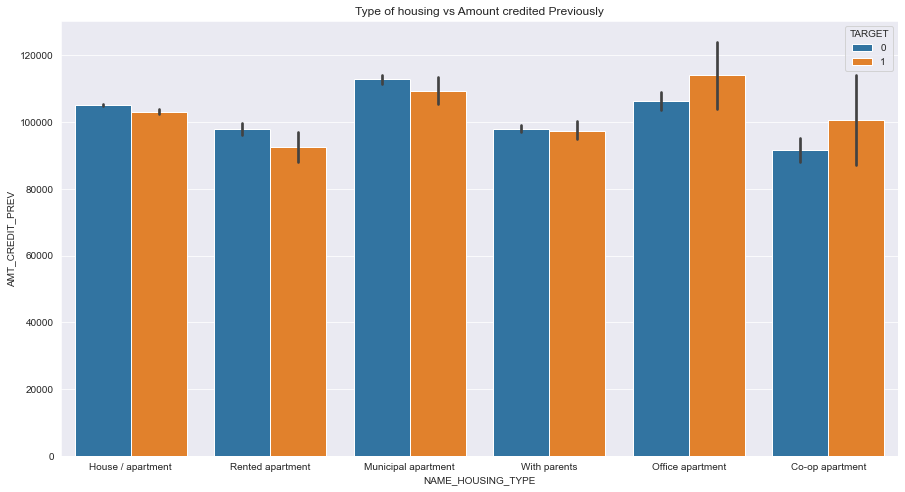

In [164]:
plt.figure(figsize=(15,8))
plt.title('Type of housing vs Amount credited Previously')
sns.barplot(data=df_merged, x='NAME_HOUSING_TYPE', y='AMT_CREDIT_PREV',hue='TARGET')
plt.show()

- The credit amount is highest for defaulters in 'office apartment', it is also much larger than that of non-defaulter in the same housing type.
- Similar case can be observed for co-op apartment.

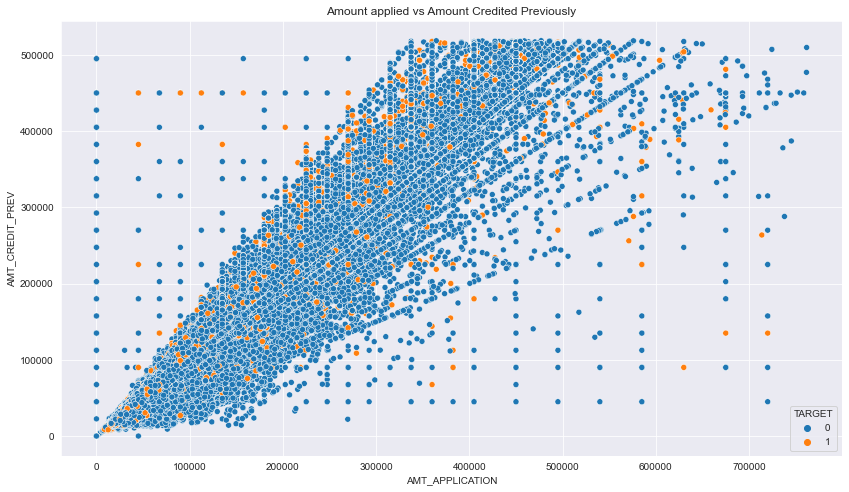

In [165]:
plt.figure(figsize=(14,8))
plt.title('Amount applied vs Amount Credited Previously')
sns.scatterplot(data =df_merged,x='AMT_APPLICATION', y='AMT_CREDIT_PREV',hue='TARGET')
plt.show()

- There seems to be a linear relationship between both the variables
- Here, we can observe some values where the amount applied is very less than amount credited. This needs to be inspected on ground.

------------------------------

## Business Recommendations

The below points are commonly found as prime indicators of defaulters and must be verified thoroughly:

- People who changed their registerations __less than 17 years ago__
- `EXT_SOURCE` score of __< 0.5__
- People with __less than 5.5 years of experience__
- People with __less than 35 years of age__
- Credit amount and goods price __below 70,000__
- Business Entity: __Type 3__ and __Self-Employed__ organization types
- People living in __region rating 3__
- Low-Skill laborers, drivers  and sales staff as occupation types
- __Academic degrees__ and __Secondary/Secondary Special__ education categories
- Income Type __'working'__


By taking the above points into consideration the officer on duty can make a decision whether to offer the loan or not.

-------------------------